**Contents:**
1. Loadind Data
 
*   Pandas Profiling Reports
*   Descriptions of Variables

2. Data Preprocessing


*   Overview of Tables
*   Fill nan Values
*   Merging and Cleaning
*    Overview of the Content of the Dataset Before Eda
    - Corelation Matrixs
    - Products
    - Categories
    - Sellers
    - Cusomers
    - Consequences

3. Exploratory Data Analysis
 

*   Canceled Orders and Reasons
*   Unavailable Orders
*   The Effects of Time-Dependent Variables on the Orders Count
    - Hours and Parts of Days
    - Months and Seasons
    - Days of Week
    - Days of Month
    - 2017 Order Count by Day and Holiday
*   The Effects of Product Promotion on the Orders Count
    - The Number of Photos, Price and Order Count
    - The Effects of Product Name Length on the Order Count
    - The Effects of Product Description Length on the Order Count
*   The Effects of Price on Customer Behavior
    - The Effects of Freight Value on the Order Count
    - Customer' Preffered Payment Method Based on the Payment Values
*   After Sales








In [ ]:
! pip install pingouin

     |████████████████████████████████| 182 kB 13.3 MB/s 
     |████████████████████████████████| 38.1 MB 484 kB/s 
     |████████████████████████████████| 9.8 MB 56.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193661 sha256=1e472f84e37b6a87c3ff6daa2e1f8c387eb49b930e66e3c776565652b00c98a5
  Stored in directory: /root/.cache/pip/wheels/14/46/f9/cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=88d53ecc0fb980a9476927e10b7ecce24f95c6bf169002a60e63b9ebb13a87a9
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling stats

In [ ]:
# İmports Libraries
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
from datetime import datetime
from scipy import stats
import pingouin as pg

In [ ]:
# sqllite3 connection
conn = sqlite3.connect(":memory:")

# Loading Data 

In [ ]:
# Reads customer table
customers = pd.read_csv("drive/MyDrive/olist_customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# Reads sellers
sellers = pd.read_csv("drive/MyDrive/olist_sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
# Reads order_items
order_items = pd.read_csv("drive/MyDrive/olist_order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# Reads payments
payments = pd.read_csv("drive/MyDrive/olist_order_payments_dataset.csv")
payments.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [ ]:
# Reads orders table
orders = pd.read_csv("drive/MyDrive/olist_orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# Reads order_reviews
order_reviews = pd.read_csv("drive/MyDrive/olist_order_reviews_dataset.csv")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
# Reads products
products = pd.read_csv("drive/MyDrive/olist_products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# Reads geolocation
geolocation = pd.read_csv("drive/MyDrive/olist_geolocation_dataset.csv")
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
# Reads product translation
product_translation = pd.read_csv("drive/MyDrive/product_category_name_translation.csv")
product_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Pandas Profiling Report** : https://colab.research.google.com/drive/1LTzAMZKJUXcp3eUMOitDzhSZKxokbUXU?authuser=1#scrollTo=br8eOSDEkSg4

(Due to the incompatibility between libraries, you can access the codes run for pandas profiling reports and the reports themselves from the link above.)

## Descriptions of Variables

**Customers**

Column's Names:

customer_id :	Id of the consumer who made the purchase.

customer_unique_id :	Unique Id of the consumer.

customer_zip_code_prefix :	Zip Code of the location of the consumer.

customer_city	: Name of the City from where order is made.

customer_state :	State Code from where order is made(Ex- sao paulo-SP).


**Sellers**

Column's Names:

seller_id :	Unique Id of the seller registered in olist.

seller_zip_code_prefix :	Zip Code of the location of the seller.

seller_city	: Name of the City of the seller.

seller_state:	State Code (Ex- sao paulo-SP)

**order_items**

Column's Names:

order_id : A unique id of order made by the consumers.

order_item_id :	A Unique id given to each item ordered in the order.

product_id :	A unique id given to each product available on the site.

seller_id : Unique Id of the seller registered in olist.

shipping_limit_date :	The date before which shipping of the ordered product must be completed.

price :	Actual price of the products ordered .

freight_value :	Price rate at which a product is delivered from one point to another.

**payments**

Column's Names:

order_id :	A unique id of order made by the consumers.

payment_sequential :	sequences of the payments made in case of EMI.

payment_type :	mode of payment used.(Ex-Credit Card)

payment_installments :	number of installments in case of EMI purchase.

payment_value :	Total amount paid for the purshase order

**orders**

Column's Names:

order_id :	A unique id of order made by the consumers.

customer_id :	Id of the consumer who made the purchase.

order_status :	status of the order made i.e delivered, shipped etc.

order_purchase_timestamp :	Timestamp of the purchase.

order_approved_at :	Timestamp of the order approval.

order_delivered_carrier_date :	delivery date at which carrier made the delivery.

order_delivered_customer_date :	date at which customer got the product.

order_estimated_delivery_date :	estimated delivery date of the products.

**order_reviews**

Column's Names:

review_id :	Id of the review given on the product ordered by the order id.

order_id :	A unique id of order made by the consumers.

review_score :	review score given by the customer for each order on the scale of 1–5.

review_comment_title :	Title of the review

review_comment_message :	Review comments posted by the consumer for each order.

review_creation_date :	Timestamp of the review when it is created.

review_answer_timestamp :	Timestamp of the review answere

**products**

Column's Names:

product_id :	A unique identifier for the proposed project.

product_category_name :	Name of the product category

product_name_lenght :	length of the string which specify the name given to the products ordered.

product_description_lenght :	length of the description written for each product ordered on the site.

product_photos_qty :	Number of photos of each product ordered available on the shopping portal.

product_weight_g :	Weight of the products ordered in grams.

product_length_cm :	Length of the products ordered in centimeters.

product_height_cm :	Height of the products ordered in centimeters.

product_width_cm :	width of the product ordered in centimeters.

**geolocation**

Column's Names:

geolocation_zip_code_prefix : Zip code of geolocation

geolocation_lat : Latitude of geolacation

geolocation_lng : Longitude of geolacation

geolocation_city : Geolocation city

geolocation_state :  Geolocation State

**product_translation**

Column's Names:

product_category_name : Product category name in Portugese

product_category_name_english : Product category name in English

# Data Preprocessing

## Overview of Tables

In [ ]:
customers.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   customer_id               99441 non-null  bool 
 1   customer_unique_id        99441 non-null  bool 
 2   customer_zip_code_prefix  99441 non-null  bool 
 3   customer_city             99441 non-null  bool 
 4   customer_state            99441 non-null  bool 
dtypes: bool(5)
memory usage: 485.7 KB


In [ ]:
geolocation.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype
---  ------                       --------------    -----
 0   geolocation_zip_code_prefix  1000163 non-null  bool 
 1   geolocation_lat              1000163 non-null  bool 
 2   geolocation_lng              1000163 non-null  bool 
 3   geolocation_city             1000163 non-null  bool 
 4   geolocation_state            1000163 non-null  bool 
dtypes: bool(5)
memory usage: 4.8 MB


In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
product_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## Fill nan Values

In [ ]:
# Filling null value of review comments with no_review
order_reviews['review_comment_message'].fillna('no_review',inplace=True)

In [ ]:
# Fills missing numeric values with median 
products['product_weight_g'].fillna(products['product_weight_g'].median(),inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].median(),inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].median(),inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].median(),inplace=True)

In [ ]:
# Fills missing date
orders["order_approved_at"].fillna(orders["order_purchase_timestamp"], inplace=True)
orders["order_delivered_customer_date"].fillna(orders["order_estimated_delivery_date"], inplace=True)

## Merging and Cleaning

In [ ]:
# Dropping order delivery carrier date
orders.drop(labels='order_delivered_carrier_date',axis=1,inplace=True)

I created two main dataframes while merging all the tables. These are combinations of all other tables with  the Payment table and without the Payment table. The payment_type data in the payment table contained more than one payment type for the same order and the same product, and when I merged the payment table with other tables, the number of orders was dublicated. Since I thought that the inferences I would make would not reflect the facts, I created two different general dataframes and used these dataframes depending on the content of my research location. 


In [ ]:
# df includes orders, order_items, products, customers, sellers, order reviews, translations
order_details=pd.merge(orders, order_items, on="order_id") # order and order _items 
orders_and_product=pd.merge(order_details,products, on="product_id") # products, orders and order_items
df = pd.merge(orders_and_product,customers, on="customer_id") # (df) products, orders, order_items and customers 
df = pd.merge(df,sellers, on="seller_id") # (df) products, orders, order_items, customers and sellers 
df = pd.merge(df,order_reviews, on="order_id") # (df) products, orders, order_items, customers, sellers and order reviwers
df = pd.merge(df,product_translation, on="product_category_name") # (df) and translations 
df = df.drop('product_category_name', 1) # Deletes brazilian product category name because there has already use english version
df = df.rename(columns={'product_category_name_english': 'product_category_name'}) # Changes product_category_name_english column name with product_category_name

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,40.0,268.0,4.0,500.0,19.0,8.0,13.0,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,9350,maua,SP,1bafb430e498b939f258b9c9dbdff9b1,3,NaN,no_review,2017-11-08 00:00:00,2017-11-10 19:52:38,housewares
4,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-28 20:12:20,2017-09-14 00:00:00,2,be03d93320192443b8fa24c0ca6ead98,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-30 11:45:25,46.80,67.70,59.0,189.0,3.0,775.0,16.0,16.0,13.0,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,9350,maua,SP,8899ca945efd951c97107b4966289227,1,NaN,Prezados que porcaria de atendimento ao client...,2017-08-29 00:00:00,2017-08-30 02:26:02,housewares


In order to avoid confusion in the visualizations, I convert the feature ids to the shortest possible 

In [ ]:
len(df['product_id'].unique()) # unique product count

32171

In [ ]:
len(df['product_id'].str[-8:].unique()) # first 8 character of products is spesific for each unique product

32171

In [ ]:
df['product_id']=df['product_id'].str[-8:] # changes all product id with first eight character

In [ ]:
len(df['seller_id'].unique()) # unique seller count

3028

In [ ]:
len(df['seller_id'].str[-8:].unique()) # first 8 character of seller is spesific for each unique seller

3028

In [ ]:
df['seller_id']=df['seller_id'].str[-8:] # changes all seller id with first eight character

In [ ]:
len(df['customer_id'].unique()) # unique customer count

96517

In [ ]:
len(df['customer_id'].str[-8:].unique()) # first 8 character of customer is spesific for each unique customer

96517

In [ ]:
df['customer_id']=df['customer_id'].str[-8:] # changes all customer id with first eight character

In [ ]:
len(df['customer_unique_id'].unique()) # unique customer count

93397

In [ ]:
len(df['customer_unique_id'].str[-8:].unique()) # first 8 character of customer is spesific for each unique customer

93397

In [ ]:
df['customer_unique_id']=df['customer_unique_id'].str[-8:] # changes all customer id with first eight character

In [ ]:
# df_with_paymentDetails includes orders, order_items, products, customers, sellers, order reviews, translations and payments
df_with_paymentDetails = pd.merge(df,payments, on="order_id") # (df) products, orders, order_items, customers, sellers, order reviwers and payments 

In [ ]:
df_with_paymentDetails.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,c7ac498a,c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2b4e5bff,3149,sao paulo,SP,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,c7ac498a,c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2b4e5bff,3149,sao paulo,SP,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,c7ac498a,c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2b4e5bff,3149,sao paulo,SP,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,7daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28 00:00:00,1,c7ac498a,c94d59d9,2017-08-21 20:05:16,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,28cb05f7,3366,sao paulo,SP,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,housewares,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15 00:00:00,1,c7ac498a,c94d59d9,2017-08-08 18:37:31,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,be23d235,2290,sao paulo,SP,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,housewares,1,credit_card,1,37.77


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110750 entries, 0 to 110749
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110750 non-null  object 
 1   customer_id                    110750 non-null  object 
 2   order_status                   110750 non-null  object 
 3   order_purchase_timestamp       110750 non-null  object 
 4   order_approved_at              110750 non-null  object 
 5   order_delivered_customer_date  110750 non-null  object 
 6   order_estimated_delivery_date  110750 non-null  object 
 7   order_item_id                  110750 non-null  int64  
 8   product_id                     110750 non-null  object 
 9   seller_id                      110750 non-null  object 
 10  shipping_limit_date            110750 non-null  object 
 11  price                          110750 non-null  float64
 12  freight_value                 

In [ ]:
df.isnull().sum() 

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_customer_date        0
order_estimated_delivery_date        0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                     0
product_length_cm                    0
product_height_cm                    0
product_width_cm                     0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
seller_zip_code_prefix               0
seller_city              

In [ ]:
df[df.duplicated(keep='first')].shape # check if duplicated rows exist

(0, 34)

In [ ]:
df_with_paymentDetails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115609 non-null  object 
 5   order_delivered_customer_date  115609 non-null  object 
 6   order_estimated_delivery_date  115609 non-null  object 
 7   order_item_id                  115609 non-null  int64  
 8   product_id                     115609 non-null  object 
 9   seller_id                      115609 non-null  object 
 10  shipping_limit_date            115609 non-null  object 
 11  price                          115609 non-null  float64
 12  freight_value                 

## Overview of the Content of the Dataset Before Eda

Before starting exploratory data analysis, this section includes works to see the general distributions in the data set and to detect if there has been excessive shopping between certain customers and sellers.

### Corelation Matrixs

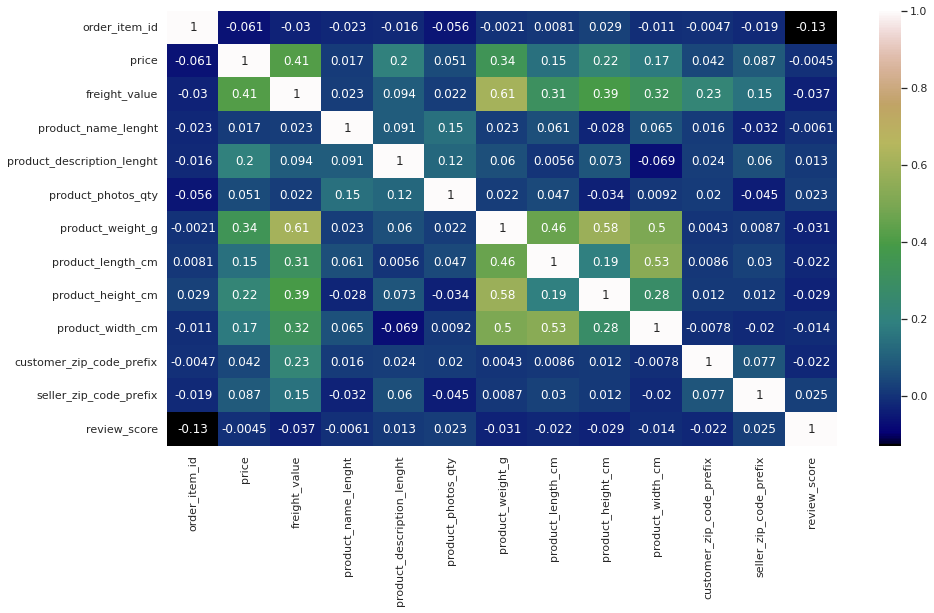

In [ ]:
# Correlation between in df numeric features
plt.figure(figsize=(15,8))
c= df.corr()
sns.heatmap(c,cmap="gist_earth",annot=True)
plt.show()

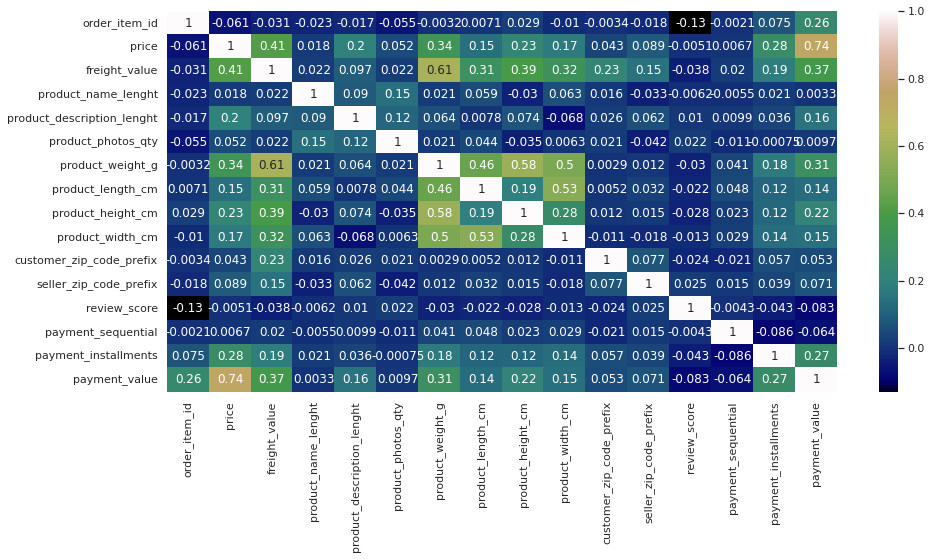

In [ ]:
# Correlation between df_with_paymentDetails numeric features
plt.figure(figsize=(15,7))
c= df_with_paymentDetails.corr()
sns.heatmap(c,cmap="gist_earth",annot=True)

### Products

Text(0.5, 1.0, 'Top 10 Products')

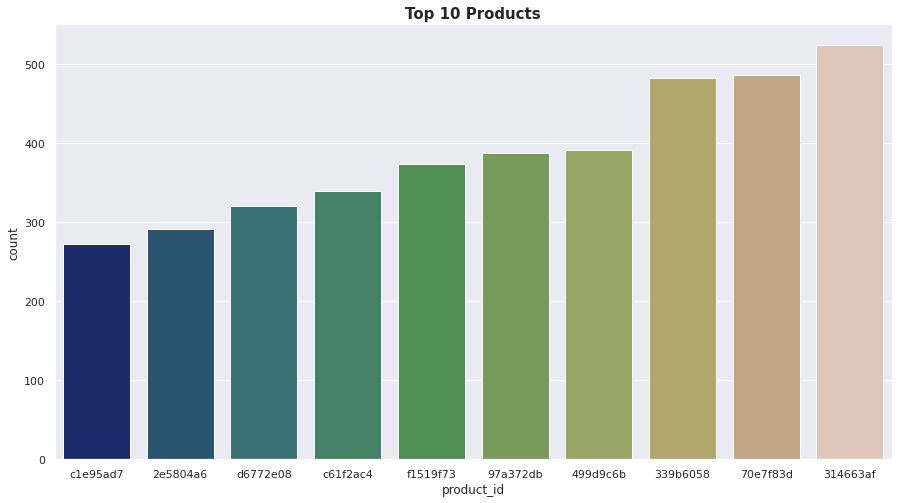

In [ ]:
# Visualization of top 10 Products
plt.figure(figsize=(15,8))
sns.countplot(x='product_id', data=df, palette='gist_earth',
             order=df['product_id'].value_counts()[:10]\
             .sort_values().index).set_title("Top 10 Products", fontsize=15,
                                             weight='bold')

### Categories

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

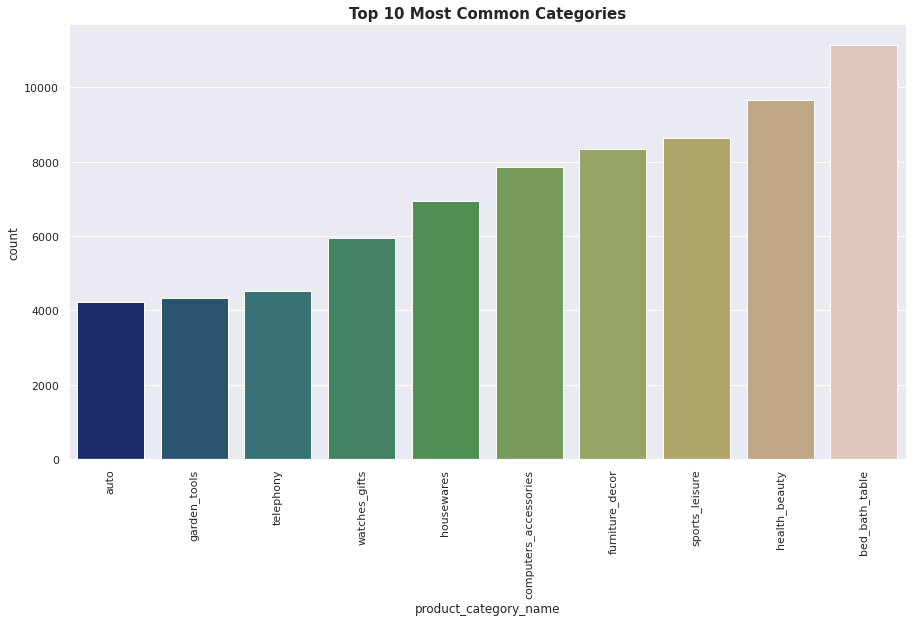

In [ ]:
# Visualization of top 10  product category
plt.figure(figsize=(15,8))
sns.countplot(x='product_category_name', data=df, palette='gist_earth',
             order=df['product_category_name'].value_counts()[:10]\
             .sort_values().index).set_title("Top 10 Most Common Categories", fontsize=15,
                                             weight='bold')
plt.xticks(rotation=90)

In [ ]:
top10category = df['product_category_name'].value_counts()[:10].sort_values().index

In [ ]:
common_category_df = pd.DataFrame()
for i in top10category:
  common_category_df = common_category_df.append(df[df["product_category_name"]==i],ignore_index=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

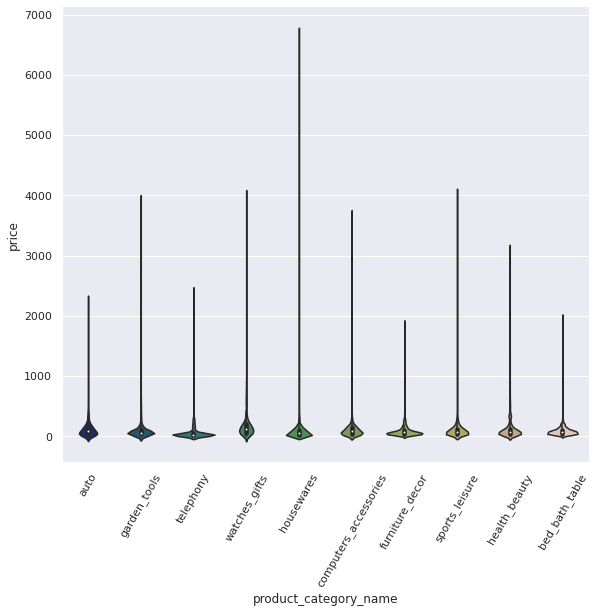

In [ ]:
# Price distribution of products in the top 10 best-selling product categories 
sns.catplot(data=common_category_df, x="product_category_name", y="price", kind ="violin", palette="gist_earth", height=7.2, aspect=1.2)
plt.xticks(rotation=60)

#### Number of products in product categories

In [ ]:
# Product count distributions respect to category name
products = pd.merge(products,product_translation, on="product_category_name") # Merge products and product_translation 

products.to_sql("products",  conn, if_exists="replace") 

product_count_on_categories = pd.read_sql(
    """
    select product_category_name_english, count(1) product_count
    from products
    group by product_category_name
    order by product_count desc
    """
    ,conn)
product_count_on_categories

,product_category_name_english,product_count
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
...,...,...
66,tablets_printing_image,9
67,home_comfort_2,5
68,fashion_childrens_clothes,5
69,security_and_services,2


In [ ]:
products_eng = pd.merge(products,product_translation,on="product_category_name")

Text(0.5, 1.0, 'Product count Distribution on Category')

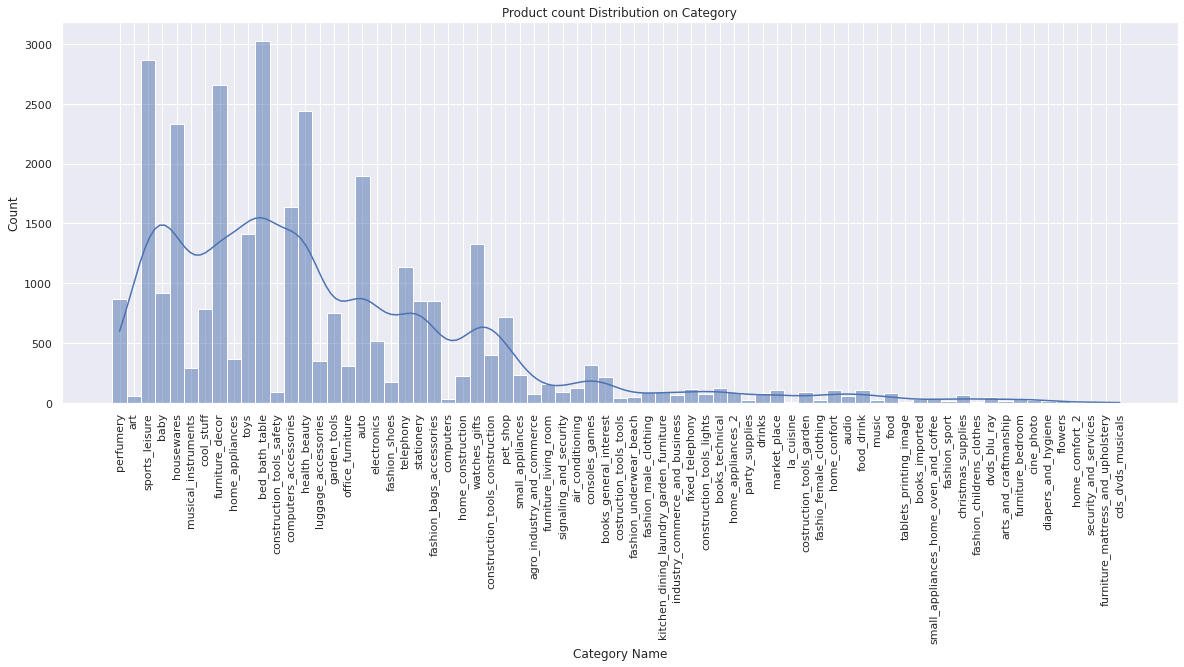

In [ ]:
# Histogram : Number of products in product categories
products_eng = pd.merge(products,product_translation,on="product_category_name")
plt.figure(figsize=(20,7))
sns.histplot(data=products_eng, x="product_category_name_english_x", kde=True)
plt.xlabel("Category Name")
plt.xticks(rotation=90)
plt.title("Product count Distribution on Category")

In [ ]:
# Products purchased in bulk
df.to_sql("brazilian_data",  conn, if_exists="replace") 
customer_and_product = pd.read_sql(
    """
    SELECT customer_unique_id, product_id, product_category_name, order_purchase_timestamp, COUNT(1) AS count_of_order
    FROM brazilian_data
    GROUP BY customer_unique_id, product_id, order_purchase_timestamp
    ORDER BY count_of_order DESC
    """
    ,conn
)
customer_and_product.head(10)

,customer_unique_id,product_id,product_category_name,order_purchase_timestamp,count_of_order
0,7b94d4fb,997606b3,computers_accessories,2018-02-22 15:30:41,20
1,a6f50e8e,b82f462d,garden_tools,2017-01-30 21:44:49,15
2,e15bbffb,24a974a8,furniture_decor,2017-11-23 20:30:52,15
3,7a41dfa6,70e7f83d,garden_tools,2017-12-13 14:21:15,14
4,fc546604,697b13c2,telephony,2018-02-21 11:45:07,14
5,ec91b375,74215fed,telephony,2018-04-12 11:02:51,13
6,6ac7e38b,aef08dff,housewares,2017-10-09 20:45:45,12
7,7bc9baf3,78b586e9,furniture_decor,2018-01-12 16:19:31,12
8,ea002b21,ec1aa3d1,watches_gifts,2018-01-11 10:03:39,12
9,f4ba625b,84506b3a,office_furniture,2017-09-22 17:41:49,12


### Sellers

Text(0.5, 1.0, 'Top 10 Sellers')

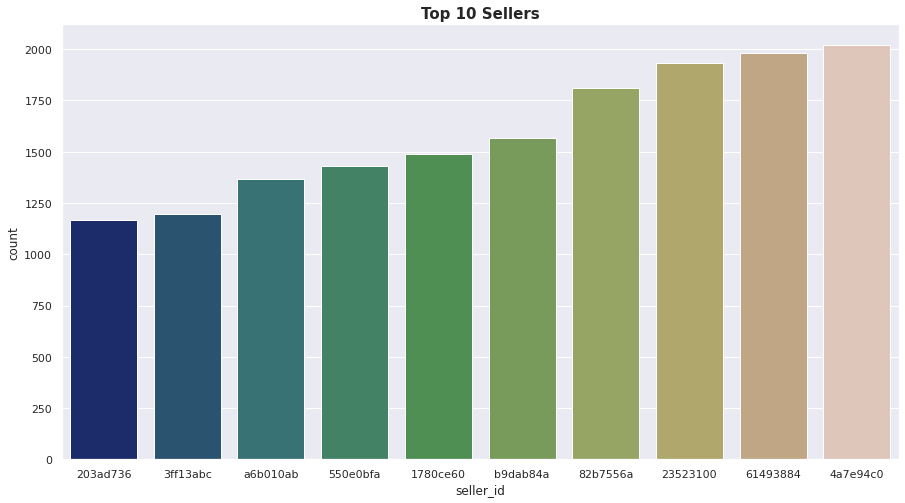

In [ ]:
# Visualization of top 10 Seller
plt.figure(figsize=(15,8))
sns.countplot(x='seller_id', data=df, palette='gist_earth',
             order=df['seller_id'].value_counts()[:10]\
             .sort_values().index).set_title("Top 10 Sellers", fontsize=15,
                                             weight='bold')

In [ ]:
# Sellers selling multiple unique products 
df.to_sql("braziliandata",  conn, if_exists="replace") 
multi_product_seller  = pd.read_sql(
    """
    SELECT seller_id, seller_city, COUNT( DISTINCT product_id) AS num_of_product
    FROM braziliandata
    GROUP BY seller_id
    HAVING num_of_product>1
    ORDER BY num_of_product desc
    """
    ,conn)
multi_product_seller.head()

,seller_id,seller_city,num_of_product
0,61493884,ibitinga,398
1,e2301306,ibitinga,319
2,dfb37e4f,praia grande,312
3,2fecda94,sumare,288
4,11c4eba2,penapolis,264


In [ ]:
# Sellers selling multiple unique product categories 
multi_productCategory_seller  = pd.read_sql(
    """
    SELECT seller_id, seller_city, COUNT( DISTINCT product_category_name) AS num_of_category
    FROM braziliandata
    GROUP BY seller_id
    HAVING num_of_category>1
    ORDER BY num_of_category desc
    """
    ,conn)
multi_productCategory_seller

,seller_id,seller_city,num_of_category
0,6fe42594,sao paulo,27
1,d1c939f5,jacarei,23
2,1780ce60,sao paulo,22
3,87f97c23,sao paulo,21
4,a46f01b0,salto,19
...,...,...,...
1298,fca27c76,sao paulo,2
1299,fe300e21,sao caetano do sul,2
1300,feba38b3,massaranduba,2
1301,ff912bf6,sorocaba,2


In [ ]:
# The number of transactions between the sellers and the customers 
transactions_count  = pd.read_sql(
    """
    SELECT seller_id, seller_city, customer_unique_id, customer_city, COUNT(1) AS num_of_transiction, COUNT( DISTINCT product_category_name) AS num_of_category, COUNT(DISTINCT product_id) AS num_of_product
    FROM braziliandata
    GROUP BY seller_id, customer_unique_id
    HAVING num_of_transiction>1
    ORDER BY num_of_transiction desc
    """
    ,conn)
transactions_count 

,seller_id,seller_city,customer_unique_id,customer_city,num_of_transiction,num_of_category,num_of_product
0,853d8905,lauro de freitas,a17884a1,porto alegre,24,1,1
1,8a5a56e9,sao paulo,82debd19,sao paulo,21,1,3
2,08cc3ab7,ibitinga,9c2d481b,sao paulo,20,1,6
3,bda59eba,sao jose dos campos,7b94d4fb,sao paulo,20,1,1
4,58fe7e39,fernandopolis,e15bbffb,uniao da vitoria,15,1,1
...,...,...,...,...,...,...,...
9585,ff7ab48f,franca,d79be033,brusque,2,1,2
9586,ffaaef10,sao paulo,fd0470c3,sao domingos do prata,2,1,1
9587,ffb5f250,guaruja,a05b1fc7,florianopolis,2,1,1
9588,ffd0cfbb,itajai,b2685f66,santa rosa de viterbo,2,1,2


### Customers

Text(0.5, 1.0, 'Top 10 Cusotmers')

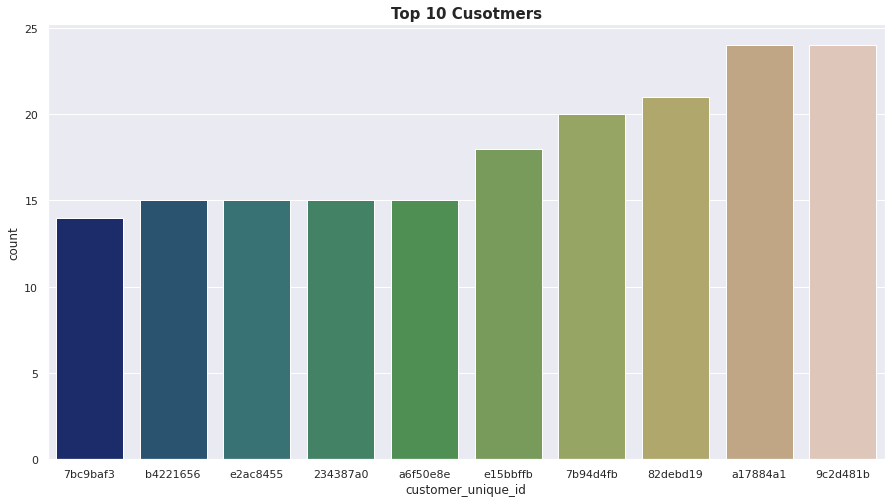

In [ ]:
# Visualization of top 10 Customer
plt.figure(figsize=(15,8))
sns.countplot(x='customer_unique_id', data=df, palette='gist_earth',
             order=df['customer_unique_id'].value_counts()[:10]\
             .sort_values().index).set_title("Top 10 Cusotmers", fontsize=15,
                                             weight='bold')

In [ ]:
# Ranking of products purchased by customers from most to least 
customer_and_product = pd.read_sql(
    """
    SELECT customer_unique_id, product_id, product_category_name, COUNT(1) AS count_of_order
    FROM brazilian_data
    GROUP BY customer_unique_id, product_id
    ORDER BY count_of_order DESC
    """
    ,conn
)
customer_and_product.head(5)

,customer_unique_id,product_id,product_category_name,count_of_order
0,a17884a1,9426f28b,telephony,24
1,7b94d4fb,997606b3,computers_accessories,20
2,a6f50e8e,b82f462d,garden_tools,15
3,e15bbffb,24a974a8,furniture_decor,15
4,7a41dfa6,70e7f83d,garden_tools,14


### Consequences : We have discovered that customers do not overbought from certain sellers, so we will not do a study on catching outliers. When we examine the number of unique products over the category, the fact that spesific categories contain much more products than other categories may cause these categories to come to the fore in future analyzes. 

#****Exploratory Data Analysis****

## **Canceled Orders and Reasons**

In [ ]:
df.order_status.unique() # Unique order status variables 

array(['delivered', 'shipped', 'canceled', 'invoiced', 'processing',
       'approved', 'unavailable'], dtype=object)

Text(0.5, 1.0, 'Percentage of Canceled Orders ')

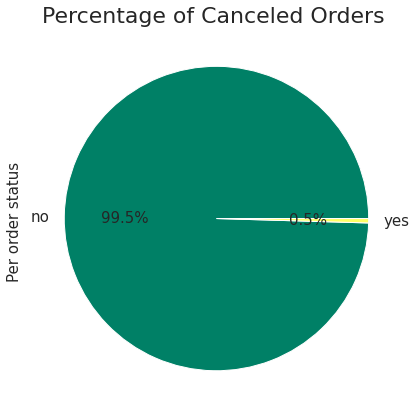

In [ ]:
# Labels all orders as "yes" if the order status is canceled and "no" if not cancelled.    
df["is_order_canceled"] = "no" 
df.loc[df["order_status"]=="canceled","is_order_canceled"] = "yes"

# Creates pie chart by is_order_canceled
fig, ax = plt.subplots(figsize =(10, 7))
df.groupby("is_order_canceled").size().plot(kind="pie", autopct="%1.1f%%", textprops={'fontsize': 15},
                                  cmap="summer", ax=ax)
ax.set_ylabel('Per order status ', size=15)
plt.title("Percentage of Canceled Orders ",size=22)

Only 0.5% of all orders in these two years have been cancelled. Now, to understand the reasons for this, I will examine the most canceled product categories, the most canceled products, the sellers with the most cancellation requests, and the customers who canceled the most orders 

In [ ]:
# The most canceled product categories
canceled10_category = df[df["is_order_canceled"]=="yes"].groupby("product_category_name")["order_id"].count().sort_values(ascending=False).head(10)
canceled10_category

product_category_name
sports_leisure           50
housewares               47
computers_accessories    44
furniture_decor          36
health_beauty            36
toys                     34
auto                     32
watches_gifts            20
baby                     20
garden_tools             19
Name: order_id, dtype: int64

In [ ]:
# The most canceled products
df[df["is_order_canceled"]=="yes"].groupby(["product_id","product_category_name"])["order_id"].count().sort_values(ascending=False).head(10)

product_id  product_category_name
884de5a6    garden_tools             6
6df7640b    furniture_decor          6
df434ee7    auto                     5
49bee6b8    computers_accessories    5
2b97070f    computers_accessories    5
310fb328    housewares               5
5f0ccf69    consoles_games           5
1ff546ec    housewares               5
3329eacc    baby                     5
339bde8d    electronics              5
Name: order_id, dtype: int64

In [ ]:
# Top 20 sellers with the most order cancellation requests
canceled_seller = df[df["is_order_canceled"]=="yes"].groupby("seller_id")["order_id"].count().sort_values(ascending=False).head(20)

# Transfers all orders that includes the top 20 sellers with the most order cancellation requests to a new dataframe that is "top20_seller"
top20_seller = pd.DataFrame(data = None, columns=df.columns)
top20_seller_list = []

for i in canceled_seller.index:
  top20_seller_list.append(df[df["seller_id"]==i])

top20_seller = pd.concat(top20_seller_list)
top20_seller

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,is_order_canceled
35158,a910f58086d58b3ae6f37aa712d377b9,57ec3d3f,delivered,2017-09-15 09:19:48,2017-09-15 09:35:18,2017-09-25 20:14:48,2017-10-11 00:00:00,1,ccfe6a30,82b7556a,2017-09-22 09:35:18,56.99,15.84,51.0,999.0,2.0,400.0,18.0,11.0,20.0,e2417cf3,78043,cuiaba,MT,9015,santo andre,SP,840e8a680fc1a09a493181e046380f59,5,NaN,no_review,2017-09-26 00:00:00,2017-09-30 23:48:54,perfumery,no
35159,a910f58086d58b3ae6f37aa712d377b9,57ec3d3f,delivered,2017-09-15 09:19:48,2017-09-15 09:35:18,2017-09-25 20:14:48,2017-10-11 00:00:00,2,ccfe6a30,82b7556a,2017-09-22 09:35:18,56.99,15.84,51.0,999.0,2.0,400.0,18.0,11.0,20.0,e2417cf3,78043,cuiaba,MT,9015,santo andre,SP,840e8a680fc1a09a493181e046380f59,5,NaN,no_review,2017-09-26 00:00:00,2017-09-30 23:48:54,perfumery,no
35160,45ed6e85398a87c253db47c2d9f48216,0c8f2d6c,delivered,2017-06-08 21:18:45,2017-06-08 21:30:18,2017-06-22 17:44:53,2017-07-10 00:00:00,1,ccfe6a30,82b7556a,2017-06-15 21:30:18,56.99,14.15,51.0,999.0,2.0,400.0,18.0,11.0,20.0,d20a6592,74595,goiania,GO,9015,santo andre,SP,b59cf587845cad9af780a2f839ee6c30,1,NaN,Produto demorou a chegar e veio diferente do q...,2017-06-23 00:00:00,2017-06-27 16:19:05,perfumery,no
35161,690199d6a2c51ff57c6b392d7680cbfd,0a59dad0,delivered,2018-03-16 11:31:18,2018-03-16 11:49:14,2018-05-14 12:28:56,2018-04-11 00:00:00,1,ccfe6a30,82b7556a,2018-03-23 11:49:14,54.99,18.26,51.0,999.0,2.0,400.0,18.0,11.0,20.0,e9026217,87323,alto sao joao,PR,9015,santo andre,SP,aa0aefb73af27de135df1f14af576264,5,NaN,no_review,2018-04-13 00:00:00,2018-04-17 17:23:15,perfumery,no
35162,fa2cc48dfd7ce0f97490bb4ab4c98eb2,c94000ee,delivered,2017-08-22 23:46:00,2017-08-23 00:32:28,2017-08-25 18:06:57,2017-09-05 00:00:00,1,ccfe6a30,82b7556a,2017-08-30 00:08:42,56.99,8.72,51.0,999.0,2.0,400.0,18.0,11.0,20.0,28ef6ea0,9070,santo andre,SP,9015,santo andre,SP,39a4b75d76363f47e3e72a3d21e7c43f,5,NaN,Chegou mais rapido do que o prazo. Pinceis oti...,2017-08-26 00:00:00,2017-08-29 19:16:42,perfumery,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105960,969c5d020e2a752154208ff5f31972ad,3a1e6902,delivered,2018-06-13 11:44:34,2018-06-13 12:33:11,2018-06-25 17:38:31,2018-07-13 00:00:00,1,b0aa0f5e,6fe42594,2018-06-21 11:56:18,249.90,34.83,46.0,207.0,2.0,4219.0,41.0,52.0,29.0,b7c8140b,18275,tatui,SP,3470,sao paulo,SP,49716575bbb993b911aa63689b5f6b10,5,NaN,no_review,2018-06-26 00:00:00,2018-06-26 22:22:29,luggage_accessories,no
109711,538d5b9c472ee5e0f766651adc2e016d,322107ce,delivered,2017-10-27 14:40:36,2017-10-27 14:50:15,2017-11-07 18:39:44,2017-11-10 00:00:00,1,c11c9609,6fe42594,2017-11-03 14:50:15,39.90,16.60,37.0,388.0,2.0,1938.0,32.0,19.0,21.0,cdf1cd7f,21380,rio de janeiro,RJ,3470,sao paulo,SP,6998bc1c77ac381c537b5a2a3e8b9cfc,3,NaN,O acabamento deixa a desejar. Tintura com vári...,2017-11-08 00:00:00,2017-11-13 11:39:28,home_appliances_2,no
109712,cf35cf6763e0db30babc4885c3b2596f,406d676c,delivered,2018-01-11 00:48:01,2018-01-11 01:08:14,2018-01-29 20:14:49,2018-02-09 00:00:00,1,c11c9609,6fe42594,2018-01-17 01:08:14,39.90,17.60,37.0,388.0,2.0,1938.0,32.0,19.0,21.0,d14c8e25,79370,ladario,MS,3470,sao paulo,SP,bf57fec970fd30f8b303fc9a789a851f,5,NaN,no_review,2018-01-30 00:00:00,2018-01-31 10:26:30,home_appliances_2,no
109713,cf35cf6763e0db30babc4885c3b2596f,406d676c,delivered,2018-01-11 00:48:01,2018-

Text(0.5, 1.0, 'Percentage Distribution of Order Statuses of Sellers with The Most Cancelled Orders')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


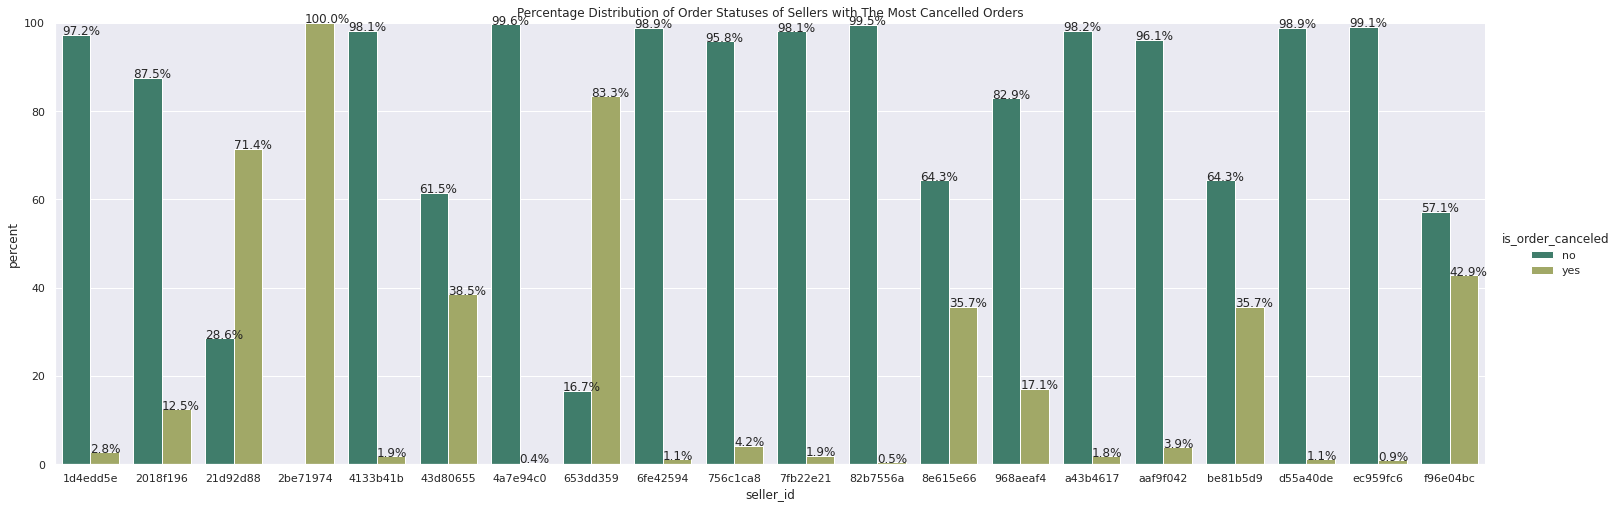

In [ ]:
# Visualization of order status comparisons of sellers with the most cancellation requests
x,y = 'seller_id', 'is_order_canceled'

df1 = top20_seller.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()


g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,  height=7, aspect=3, palette="gist_earth")
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title("Percentage Distribution of Order Statuses of Sellers with The Most Cancelled Orders")

In [ ]:
# Products and categories that the top 20 sellers with the highest number of order cancellations could not sell 
top20_seller[top20_seller["is_order_canceled"]=="yes"].groupby(["seller_id","product_id","product_category_name"])["order_id"].count()

seller_id  product_id  product_category_name
1d4edd5e   2a62f760    health_beauty            1
           326284ae    health_beauty            1
           441f864b    health_beauty            1
           53f67598    health_beauty            1
           d9434dcf    health_beauty            1
2018f196   339bde8d    electronics              5
21d92d88   1ff546ec    housewares               5
2be71974   5f0ccf69    consoles_games           5
4133b41b   3329eacc    baby                     5
           89e2bace    baby                     1
43d80655   2b97070f    computers_accessories    5
4a7e94c0   06b07808    watches_gifts            1
           24c4287f    watches_gifts            1
           520f514e    watches_gifts            1
           d78ed159    watches_gifts            1
           e1e4fc97    watches_gifts            1
           eca70959    watches_gifts            2
           f92deb0e    watches_gifts            1
653dd359   49bee6b8    computers_accessories    5
6fe42

In this section, I wanted to observe whether the sellers who received the most order cancellation requests were subject to high order cancellations because they sold very bad products. Except for a few sellers, there are no sellers who have received excessive cancellation requests. In other words, we can say that the only reason for the cancellation requests is not the products and the sellers, the customers may have created a cancellation process for different reasons.  

In [ ]:
# Customers who canceled the order and count of canceled orders
df.to_sql("braziliandata",  conn, if_exists="replace") 

canceling_cust = pd.read_sql(
    """
    SELECT customer_unique_id, is_order_canceled, COUNT(order_id) AS n
    FROM braziliandata
    WHERE customer_unique_id IN (SELECT customer_unique_id
                          FROM braziliandata
                          WHERE is_order_canceled = "yes")
    GROUP BY customer_unique_id, is_order_canceled
    ORDER BY n desc
    """
    ,conn)


canceling_cust

,customer_unique_id,is_order_canceled,n
0,6267d7f7,yes,6
1,d7bdc0bc,yes,6
2,f3813ebd,yes,6
3,1404ffea,yes,5
4,31a3747a,yes,5
...,...,...,...
449,fb386117,yes,1
450,fcadeff7,yes,1
451,fd11808e,yes,1
452,fd5bf7eb,yes,1


Text(0.5, 1.0, 'Percentage of Lost Customer ')

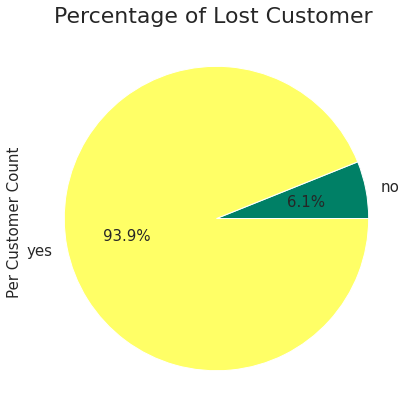

In [ ]:
# The total number of canceled orders and the number of orders that have not been canceled by each customer who has canceled an order 
lost_cust = canceling_cust.pivot_table(index="customer_unique_id", columns = "is_order_canceled", aggfunc={"n":"sum"}) 
lost_cust.fillna(0,inplace=True) # Fill null values with 0

# If the customers have not created an order again after canceling the order, these customers are lost customers and these people are labeled as "yes" and the remaining ones are labeled as "no". 
lost_cust["is_lost_customer"]="no" 
lost_cust.loc[lost_cust.n['no']==0,"is_lost_customer"]="yes"

# Visualization of the total percentage values of lost customers 
fig, ax = plt.subplots(figsize =(10, 7))
lost_cust.groupby("is_lost_customer").size().plot(kind="pie", autopct="%1.1f%%", textprops={'fontsize': 15},
                                  cmap="summer", ax=ax)
ax.set_ylabel('Per Customer Count ', size=15)
plt.title("Percentage of Lost Customer ",size=22)

93.9% of customers who canceled an order at least once did not create a repeat order. Although this is not seen as a great loss in the two-year period, it may create greater effects in the future. Necessary studies should be carried out on this issue and worse consequences that may occur in the future must be prevented. 

In [ ]:
# Tag orders by seasons
df['monthly']=pd.to_datetime(df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.month # Adds new column for month
df["seasons"]="winter"
df.loc[(df["monthly"]>=2) & (df["monthly"]<=4),"seasons"] = "spring"
df.loc[(df["monthly"]>=5) & (df["monthly"]<=7),"seasons"] = "summer"
df.loc[(df["monthly"]>=8) & (df["monthly"]<=10),"seasons"] = "fall"

In [ ]:
# Transfer of canceled orders in the top 10 most canceled product categories to canceled10_category_df 
canceled10_category_df = pd.DataFrame(data = None, columns=df.columns)
canceled10_category_list = []

for i in canceled10_category.index:
  canceled10_category_list.append(df[(df["product_category_name"]==i)&(df["is_order_canceled"]=="yes")])

canceled10_category_df = pd.concat(canceled10_category_list)
canceled10_category_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,is_order_canceled,monthly,seasons
14055,8652f7789fe1585b439154b7ae0f4285,f4166c6b,canceled,2018-02-20 14:49:42,2018-02-20 15:09:18,2018-03-12 00:00:00,2018-03-12 00:00:00,1,7ffa9120,5ec7afe9,2018-02-26 15:09:18,35.0,11.85,50.0,799.0,1.0,150.0,18.0,18.0,18.0,d413d445,15190,nhandeara,SP,11701,praia grande,SP,f22e960aa1892ea63e5924cc0b999186,1,NaN,Não recebi o produto e nem reembolso,2018-03-14 00:00:00,2018-03-14 09:08:59,sports_leisure,yes,2,spring
14670,d93ef0caa7a160caec60b4d6833415a6,425122ed,canceled,2018-06-25 16:20:24,2018-06-25 16:38:27,2018-07-23 00:00:00,2018-07-23 00:00:00,1,859ad05f,dcb7ddee,2018-06-29 16:38:27,45.0,23.31,44.0,597.0,1.0,5600.0,19.0,18.0,11.0,29c22e63,31741,belo horizonte,MG,35530,claudio,MG,63e7d80246143ac20128c947c898a3e8,1,Insatisfação,"Estou muito insatisfeito com essa loja, qualif...",2018-07-25 00:00:00,2018-07-25 06:35:25,sports_leisure,yes,6,summer
14671,d93ef0caa7a160caec60b4d6833415a6,425122ed,canceled,2018-06-25 16:20:24,2018-06-25 16:38:27,2018-07-23 00:00:00,2018-07-23 00:00:00,2,859ad05f,dcb7ddee,2018-06-29 16:38:27,45.0,23.31,44.0,597.0,1.0,5600.0,19.0,18.0,11.0,29c22e63,31741,belo horizonte,MG,35530,claudio,MG,63e7d80246143ac20128c947c898a3e8,1,Insatisfação,"Estou muito insatisfeito com essa loja, qualif...",2018-07-25 00:00:00,2018-07-25 06:35:25,sports_leisure,yes,6,summer
15142,c7da51b752a41bf0fc419eb6b929b582,43ef3076,canceled,2018-07-04 13:11:55,2018-07-05 16:35:10,2018-07-23 00:00:00,2018-07-23 00:00:00,1,423d0ccd,33eafaba,2018-07-12 13:31:01,20.0,7.40,54.0,181.0,1.0,150.0,30.0,18.0,18.0,f4cfd283,7181,guarulhos,SP,9163,santo andre,SP,efb0886cab0e624dbafaebbdc9b58a65,1,Produto não entregue,Produto pago a vista e não foi entregue,2018-07-25 00:00:00,2018-07-25 11:41:59,sports_leisure,yes,7,summer
15143,e95c2973b9be01bfe69bd4e1f33346fa,7901d91e,canceled,2018-06-28 12:10:28,2018-06-28 12:30:59,2018-07-24 00:00:00,2018-07-24 00:00:00,1,423d0ccd,33eafaba,2018-07-06 12:30:59,20.0,12.80,54.0,181.0,1.0,150.0,30.0,18.0,18.0,ebd9ba5e,15084,sao jose do rio preto,SP,9163,santo andre,SP,8414819daa8e12c0dd50b6878f0c9456,1,NaN,Fiz varias compras no mesmo dia\r\nJá recebi t...,2018-07-26 00:00:00,2018-08-01 10:59:27,sports_leisure,yes,6,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98610,3388fa275fc1b344e275af704e8d3156,b54563f8,canceled,2017-12-11 09:25:26,2017-12-11 09:33:21,2017-12-28 00:00:00,2017-12-28 00:00:00,1,9f336125,38b3a3f5,2017-12-15 09:33:21,285.0,58.90,34.0,1628.0,6.0,800.0,16.0,18.0,20.0,0f9758cb,4546,sao paulo,SP,30170,belo horizonte,MG,09554f1ed065aff41a46f304965f5e83,1,NaN,"Logistica ridicula, so nao cancelei o pedido p...",2017-12-30 00:00:00,2018-01-02 12:59:48,garden_tools,yes,12,winter
98682,127f3dbf0dfc0da17005ba12e05d988c,8f0b28db,canceled,2017-04-27 18:28:20,2017-04-29 02:45:43,2017-06-16 00:00:00,2017-06-16 00:00:00,1,ba50f484,fbd5d0b5,2017-05-12 02:45:43,449.0,70.22,49.0,551.0,3.0,8800.0,100.0,7.0,35.0,653d5238,51030,recife,PE,89228,joinville,SC,81b7b704218f20745b86957e1196729b,4,NaN,no_review,2017-06-22 00:00:00,2017-06-22 11:20:15,garden_tools,yes,4,spring
98746,db0335818a0e49d9d5bbe1ce0a99310e,b7261ef9,canceled,2017-11-15 07:45:44,2017-11-15 07:55:26,2017-11-30 00:00:00,2017-11-30 00:00:00,1,e6f916af,951b09bc,2017-11-22 07:55:26,499.0,17.10,53.0,1093.0,4.0,1300.0

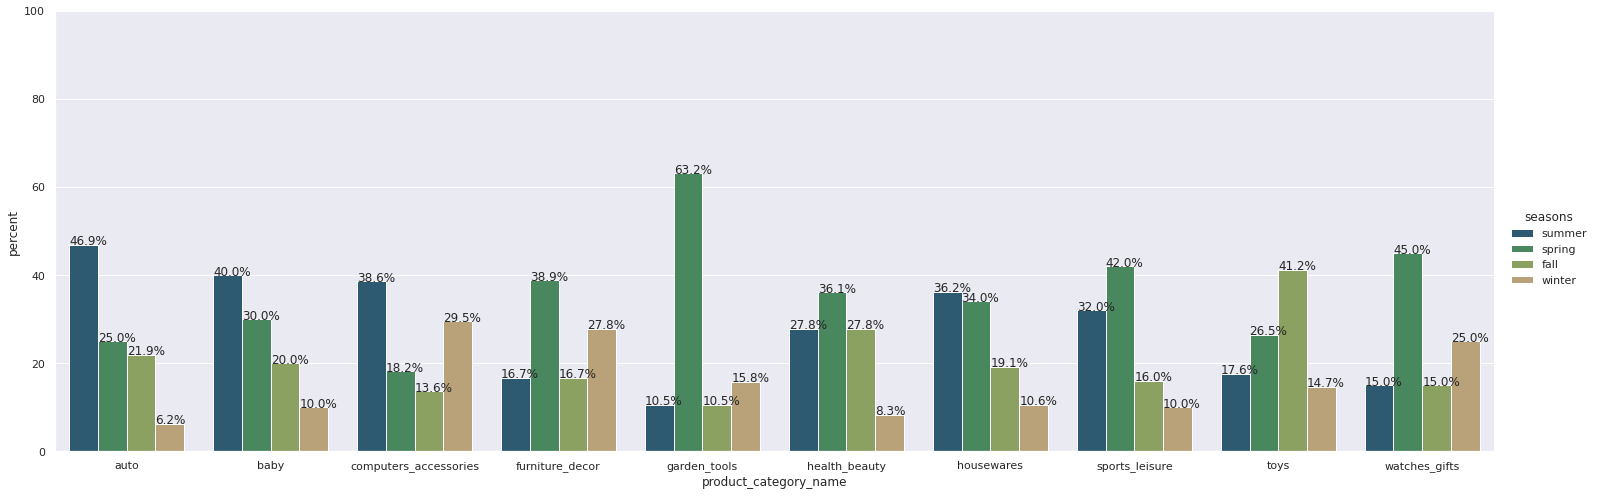

In [ ]:
# Visualization of the cancellation distribution percentages of the top 10 most canceled product categories by season 
x,y = 'product_category_name', 'seasons'

df1 = canceled10_category_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()


g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,  height=7, aspect=3, palette='gist_earth')
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In this section, I wanted to compare how many canceled products were canceled because of time. I noticed that when we look at the products canceled by season, the most canceled products are usually the products that are bought the most in that season anyway. In other words, We cannot say that customers have given up buying the product because the usage season of the product they bought has passed.  

## **Unavailable Orders**

Text(0.5, 1.0, 'Percentage of Unavailable Orders ')

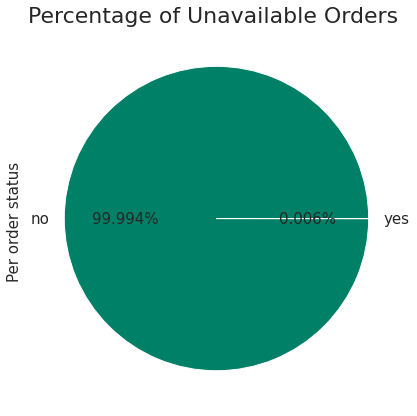

In [ ]:
# Labels all orders as "yes" if the order status is unavailable and "no" if not unavaiblable. 
df["is_unavailable"] = "no"
df.loc[df["order_status"]=="unavailable","is_unavailable"] = "yes"
# Creates pie chart by is_unavailable
fig, ax = plt.subplots(figsize =(10, 7))
df.groupby("is_unavailable").size().plot(kind="pie", autopct="%1.3f%%", textprops={'fontsize': 15},
                                  cmap="summer", ax=ax)
ax.set_ylabel('Per order status ', size=15)
plt.title("Percentage of Unavailable Orders ",size=22)

In [ ]:
df[df["is_unavailable"] == "yes"].groupby("product_category_name").size()

product_category_name
auto           1
baby           2
cool_stuff     1
electronics    1
perfumery      2
dtype: int64

Unavailable order percentage is very small. When we looked at which product categories were unavailable, we saw that they did not consist of products that could be sold depending on the seasons. In other words, we cannot say that stock management is not done properly because seasonal high orders are created on the e-commerce site. 

We didn't clear our data set of canceled orders and unavailable orders because when customers ordered these products, they created a request to receive them, and if it wasn't for a problem with the products themselves, they probably wouldn't be able to canceled them. 

After this section, it will be on time-based orders and the factors that affect the ordering status of customers. 

## **The Effects of Time-Dependent Variables on the Orders Count** 

### Hours and Parts of Days

Text(0.5, 1.0, 'The Number of Order by Hours')

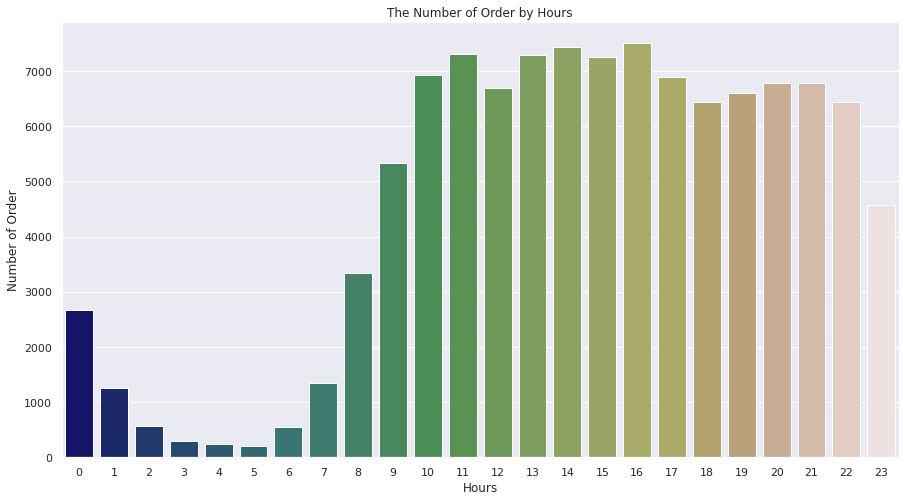

In [ ]:
# Hourly orders count distrubions
df['hourly']=pd.to_datetime(df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.hour # Adds new column for hour

# Visualization part
plt.figure(figsize=(15,8))
sns.countplot(x='hourly', data=df, palette='gist_earth')
plt.ylabel("Number of Order")
plt.xlabel("Hours")
plt.title("The Number of Order by Hours")

In [ ]:
# Tag orders by day part 
df["part_of_the_day"] = "night"
df.loc[(df['hourly']<18)&(df['hourly']>8),"part_of_the_day"] = "daytime"
df.loc[(df['hourly']>=18)&(df['hourly']<=23),"part_of_the_day"] = "evening"

Text(0.5, 1.0, 'Percentage of Orders by Parts of The Day')

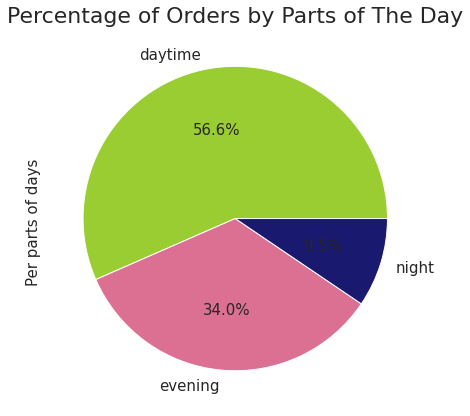

In [ ]:
# Creates pie chart by part_of_the_day
fig, ax = plt.subplots(figsize =(10, 7))
df.groupby("part_of_the_day").size().plot(kind="pie", autopct="%1.1f%%", textprops={'fontsize': 15},
                                  colors=['yellowgreen','palevioletred','midnightblue'], ax=ax)
ax.set_ylabel('Per parts of days ', size=15)
plt.title("Percentage of Orders by Parts of The Day",size=22)

Considering the number of orders per hour, it is striking that the number of orders created at noon is high. The day is divided into 3 parts in order to be able to observe more clearly whether people are making more orders during working and school hours or outside working and school hours. We labeled 00:00-08:00(included) hours as night because people usually spend their time resting. We labeled 09:00-17:00(included)  hours as working hours, that is, daytime. We labeled the remaining hours as evening. While we expect to people generate more orders outside of working and school hours, we observe the number of order creations during working and school hours is even greater than the sum of the remaining hours. The fact that the customer base mostly works at a computer or consists of people who do not work may have increased the rate of online shopping during daylight hours. In addition, people may prefer to shop more during the daytime instead of waiting for the evening hours for the product they purchased to be shipped on the same day and delivered to them quickly.

In [ ]:
df.to_sql("brazilian_data", conn, if_exists="replace")

# Total number of orders by customers according to parts of the day 
customer_time_order = pd.read_sql(
    """
    SELECT customer_unique_id AS customer_id, part_of_the_day, COUNT(1) AS count_of_order
    FROM brazilian_data
    GROUP BY customer_unique_id, part_of_the_day
    ORDER BY count_of_order DESC
    """
    ,conn
)
customer_time_order.head(10)

,customer_id,part_of_the_day,count_of_order
0,9c2d481b,daytime,24
1,a17884a1,daytime,24
2,82debd19,evening,21
3,7b94d4fb,daytime,20
4,234387a0,daytime,15
5,a6f50e8e,evening,15
6,e15bbffb,evening,15
7,7a41dfa6,daytime,14
8,7bc9baf3,daytime,14
9,fc546604,daytime,14


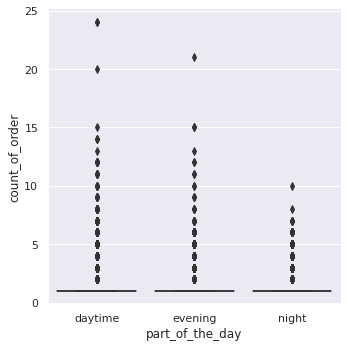

In [ ]:
# Comparison and visualization of the number of orders placed according to the parts of the day 
sns.catplot(data=customer_time_order,x="part_of_the_day",y="count_of_order",kind="box",palette="gist_earth")

In [ ]:
# T-test results of the total number of orders by customers according to the parts of the day (evening vs daytime)
sample_daytime = customer_time_order[customer_time_order["part_of_the_day"]=="daytime"]["count_of_order"]
sample_evening = customer_time_order[customer_time_order["part_of_the_day"]=="evening"]["count_of_order"]
stats.ttest_ind(sample_daytime, sample_evening)

Ttest_indResult(statistic=6.010840926970446, pvalue=1.8530825535889197e-09)

1) Null Hypothesis: Customers create a similar number of orders in the morning and evening 

H0:x¯1==x¯2 

2) Alternative Hypothesis: Customers create a different number of orders in the morning and evening 

Ha:x¯1≠x¯2 

3) Confidence Level: 95%

Conclusion: Given a t-statistic of 6.01, and p-value of 
1.8530825535889197e-09, we reject the null hypothesis that the total number of orders given by customers during the daytime and evening is the similar. Customers tend to place significantly more orders during the daytime than in the evening. 

In [ ]:
# (night vs evening)
sample_night = customer_time_order[customer_time_order["part_of_the_day"]=="night"]["count_of_order"]
stats.ttest_ind(sample_night, sample_evening)

Ttest_indResult(statistic=1.465304635831468, pvalue=0.1428453993979935)

1) Null Hypothesis: Customers create a similar number of orders in the morning and evening 

H0:x¯1==x¯2 

2) Alternative Hypothesis: Customers create a different number of orders in the morning and evening 

Ha:x¯1≠x¯2 

3) Confidence Level: 95%

Conclusion: Given a t-statistic of 1.465304635831468, and p-value of 
0.1428453993979935, we fail to reject the null hypothesis that the total number of orders given by customers during the night and evening is the similar. Customers ordering rates at night and in the evening are not significantly different 

### Months and Seasons

([<matplotlib.axis.XTick at 0x7f3fe42ca850>,
 [Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'Mar'),
  Text(0, 0, 'Apr'),
  Text(0, 0, 'May'),
  Text(0, 0, 'Jun'),
  Text(0, 0, 'July'),
  Text(0, 0, 'Aug'),
  Text(0, 0, 'Sep'),
  Text(0, 0, 'Oct'),
  Text(0, 0, 'Nov'),
  Text(0, 0, 'Dec')])

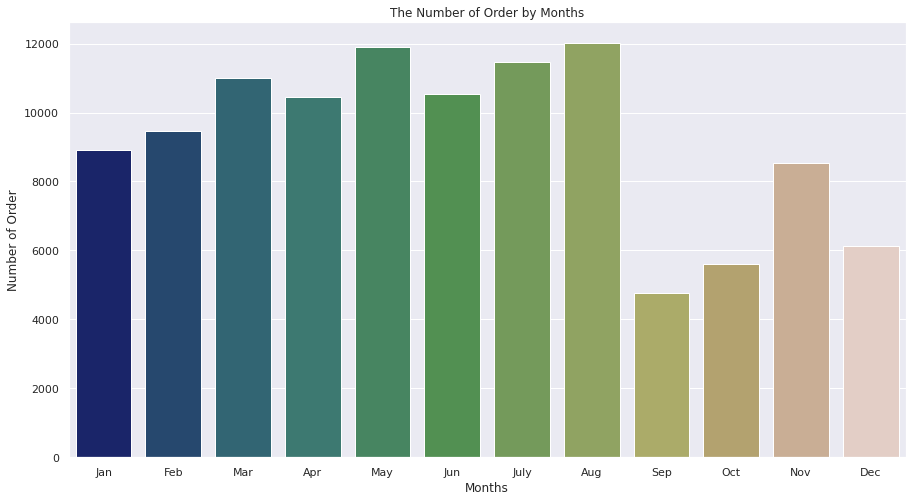

In [ ]:
# Monthly order counts 
df['monthly']=pd.to_datetime(df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.month # Adds new column for month

# Visualization part
plt.figure(figsize=(15,8))
sns.countplot(x='monthly', data=df, palette='gist_earth')
plt.ylabel("Number of Order")
plt.xlabel("Months")
plt.title("The Number of Order by Months")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","Oct","Nov","Dec"])

While the number of orders was the highest in August, the number of orders in September was the least. This may be due to the fact that the expenses of the customers increased with the opening of the schools. 

In [ ]:
# Tag orders by seasons
df["seasons"]="winter"
df.loc[(df["monthly"]>=2) & (df["monthly"]<=4),"seasons"] = "spring"
df.loc[(df["monthly"]>=5) & (df["monthly"]<=7),"seasons"] = "summer"
df.loc[(df["monthly"]>=8) & (df["monthly"]<=10),"seasons"] = "fall"

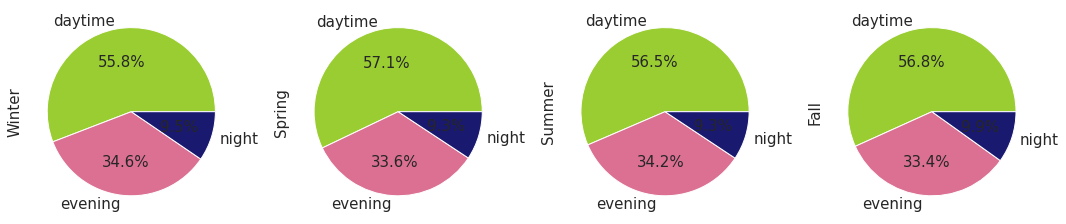

In [ ]:
# Creates pie chart by part_of_the_day for each seasons
fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=(15, 8))
df[df["seasons"]=="winter"].groupby("part_of_the_day").size().plot(kind="pie", autopct="%1.1f%%", textprops={'fontsize': 15},
                                  colors=['yellowgreen','palevioletred','midnightblue'], ax=ax1)
df[df["seasons"]=="spring"].groupby("part_of_the_day").size().plot(kind="pie", autopct="%1.1f%%", textprops={'fontsize': 15},
                                  colors=['yellowgreen','palevioletred','midnightblue'], ax=ax2)
df[df["seasons"]=="summer"].groupby("part_of_the_day").size().plot(kind="pie", autopct="%1.1f%%", textprops={'fontsize': 15},
                                  colors=['yellowgreen','palevioletred','midnightblue'], ax=ax3)
df[df["seasons"]=="fall"].groupby("part_of_the_day").size().plot(kind="pie", autopct="%1.1f%%", textprops={'fontsize': 15},
                                  colors=['yellowgreen','palevioletred','midnightblue'], ax=ax4)
ax1.set_ylabel('Winter', size=15)
ax2.set_ylabel('Spring', size=15)
ax3.set_ylabel('Summer', size=15)
ax4.set_ylabel('Fall', size=15)
plt.tight_layout()
plt.show()

When we divide the orders percentage of the parts of the day into seasons, it is observed that the order rate of all seasons is similar. The daily routine changes of customers when they are working or not working in the summer did not make a noticeable difference on order creation hours. 

Text(0.5, 1.0, 'Percentage of Orders by Seasons')

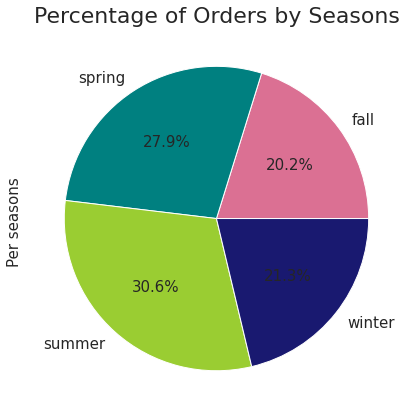

In [ ]:
# Creates pie chart by seasons
fig, ax = plt.subplots(figsize =(10, 7))
df.groupby("seasons").size().plot(kind="pie", autopct="%1.1f%%", textprops={'fontsize': 15},
                                  colors=['palevioletred',"teal",'yellowgreen','midnightblue'], ax=ax)
ax.set_ylabel('Per seasons ', size=15)
plt.title("Percentage of Orders by Seasons",size=22)

In [ ]:
df.to_sql("brazilian_data", conn, if_exists="replace")

# Total price paid by customers according to seasons  
customer_seasons_order = pd.read_sql(
    """
    SELECT customer_unique_id AS customer_id, seasons, SUM(price) AS total_payment
    FROM brazilian_data
    GROUP BY customer_id, seasons
    ORDER BY total_payment DESC
    """
    ,conn
)
customer_seasons_order.head(5)

,customer_id,seasons,total_payment
0,5afaa872,fall,13440.0
1,6f662b93,summer,7160.0
2,88ceb526,spring,6735.0
3,a7c35ed6,summer,6499.0
4,9e360987,winter,5934.6


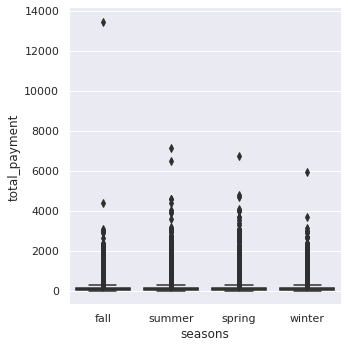

In [ ]:
# Box plot visualization of total price paid by customers according to seasons 
sns.catplot(data=customer_seasons_order,x="seasons",y="total_payment",kind="box",palette="gist_earth")

In [ ]:
# Run the ANOVA
aov = pg.anova(data=customer_seasons_order, dv='total_payment', between='seasons', detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,seasons,3.521370e+05,3,117379.016370,2.660431,0.046406,0.000083
1,Within,4.258182e+09,96513,44120.299825,NaN,NaN,NaN


Total price paid by customers for 4 seasons are significantly different from each other. However in the anova test method, T-test is applied between summer-fall and winter-spring, since it is not clear in which seasons customers are inclined to spend more.

In [ ]:
# T-test results of total price paid by customers according to seasons (summer vs fall)
sample_spring= customer_seasons_order[customer_seasons_order["seasons"]=="spring"]["total_payment"]
sample_winter = customer_seasons_order[customer_seasons_order["seasons"]=="winter"]["total_payment"]
stats.ttest_ind(sample_spring, sample_winter)

Ttest_indResult(statistic=2.094754858754839, pvalue=0.036198089371008414)

1) Null Hypothesis: The total prices of products purchased by customers in spring and winter are not significantly different.

H0:x¯1==x¯2

2) Alternative Hypothesis: The total prices of products purchased by customers in spring and winter are significantly different.

Ha:x¯1≠x¯2

3) Confidence Level: 95%

Conclusion: Given a t-statistic of 2.094754858754839, and p-value of 0.036198089371008414, we reject the null hypothesis that the total prices of products purchased by customers in spring and winter are significantly different.

In [ ]:
# T-test results of total price paid by customers according to seasons (summer vs fall)
sample_summer = customer_seasons_order[customer_seasons_order["seasons"]=="summer"]["total_payment"]
sample_fall = customer_seasons_order[customer_seasons_order["seasons"]=="fall"]["total_payment"]
stats.ttest_ind(sample_summer, sample_fall)

Ttest_indResult(statistic=0.19806161497008934, pvalue=0.8429976756623981)

1) Null Hypothesis: The total prices of products purchased by customers in summer and autumn are not significantly different. 

H0:x¯1==x¯2

2) Alternative Hypothesis: The total prices of products purchased by customers in summer and autumn are significantly different. 


Ha:x¯1≠x¯2

3) Confidence Level: 95%

Conclusion: Given a t-statistic of 0.19806161497008934, and p-value of 
0.8429976756623981, we fail to reject the null hypothesis that the total prices of products purchased by customers in summer and autumn are not significantly different. 

According to the T-test results, as we can see in the Percentage of Orders by Seasons pie chart, the total number of orders created in the spring was higher, and the total price paid by the customers in the spring were higher than the winter. Surprisingly, although the number of orders created in the summer was higher than the number of orders created in the fall, the total payments made by the customers in these seasons gave very close results. It can be said that the reason why the total payments made by the customers in summer and winter months are significantly similar is due to the fact that black friday is in November and some customers have paid too much for this day. 

The next section includes the visualization of the sales rates of the top 10 best-selling product categories according to the seasons, as it will predict the storages to be made. 

In [ ]:
# Creates a new DataFrame of all orders containing the top 10 product categories 
to10category = df['product_category_name'].value_counts()[:10].sort_values().index
top10category_df = pd.DataFrame(data = None, columns=df.columns)
top10category_list = []
for i in to10category:
  top10category_list.append(df[df['product_category_name']==i]) 

top10category_df = pd.concat(top10category_list)
top10category_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,is_order_canceled,monthly,seasons,is_unavailable,hourly,part_of_the_day
51191,47770eb9100c2d0c44946d9cf07ec65d,1a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04 00:00:00,1,e5594415,cf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,398680e8,75265,vianopolis,GO,14840,guariba,SP,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,no_review,2018-08-18 00:00:00,2018-08-22 19:07:58,auto,no,8,fall,no,8,night
51192,b2cb3ebf627fc0385565fc328822fdc9,229fe7ad,delivered,2017-12-11 16:44:24,2017-12-11 16:55:11,2017-12-21 14:08:37,2018-01-11 00:00:00,2,577dd8b9,43bc49c4,2017-12-15 16:55:11,29.90,14.61,44.0,361.0,1.0,200.0,35.0,4.0,26.0,3b6969a8,8021,sao paulo,SP,88715,jaguaruna,SC,fde1ccc66baaa51fd8ca327a22231fff,1,NaN,Até o momento recebi apenas a lixeira. Nao rec...,2017-12-22 00:00:00,2017-12-24 02:29:50,auto,no,12,winter,no,16,daytime
51193,27687629d1e64c201354bd2599e86782,c1ebb7e9,delivered,2018-05-22 18:47:34,2018-05-22 19:17:09,2018-06-04 14:55:57,2018-06-11 00:00:00,1,e5594415,52b0f386,2018-05-24 19:17:09,158.90,18.99,46.0,232.0,1.0,420.0,24.0,19.0,21.0,becb3f45,1021,sao paulo,SP,35570,formiga,MG,b891ac590ac732ccd0ef95b533102e64,5,excelente,"chegou antes do esperado, mesmo com a greve.\r...",2018-06-05 00:00:00,2018-06-05 18:24:46,auto,no,5,summer,no,18,evening
51194,e7f861ca5d9143d8e586bd85b1aa5bdf,37e77763,delivered,2018-07-16 21:48:37,2018-07-16 22:05:11,2018-07-23 20:16:55,2018-08-06 00:00:00,1,e5594415,37ac7d6d,2018-07-18 22:05:11,158.90,19.21,46.0,232.0,1.0,420.0,24.0,19.0,21.0,31f3f18b,38304,ituiutaba,MG,14850,pradopolis,SP,c532a983a15565e01ef034636618e09d,5,NaN,no_review,2018-07-24 00:00:00,2018-07-24 23:34:31,auto,no,7,summer,no,21,evening
51195,443a73a22cd4e0078a47c275b358b786,a3747e62,delivered,2018-05-16 12:22:12,2018-05-16 12:39:38,2018-06-07 15:58:37,2018-06-08 00:00:00,1,d43cebc9,582c6de8,2018-05-18 12:31:08,25.90,18.23,27.0,299.0,4.0,300.0,51.0,15.0,15.0,5435ae82,85620,salgado filho,PR,8752,mogi das cruzes,SP,d8a2f7757cc738b8fae1c882f11229a2,5,Produto entregue,O pruto deveria vim especificados a metragem c...,2018-06-08 00:00:00,2018-06-10 19:20:13,auto,no,5,summer,no,12,daytime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91596,1d211ed3ac0f4b3a52d4fb038f02da04,69034074,invoiced,2018-03-29 09:57:50,2018-03-29 10:15:12,2018-04-11 00:00:00,2018-04-11 00:00:00,1,55f73258,286dd546,2018-04-04 10:15:12,34.99,8.29,42.0,344.0,1.0,435.0,32.0,5.0,27.0,3b652d33,18070,sorocaba,SP,2565,sao paulo,SP,e20ae0855757cb01f251ffc1df26b3a5,1,NaN,Foi a primeira é última vez que compro desta e...,2018-04-13 00:00:00,2018-04-13 03:52:26,bed_bath_table,no,3,spring,no,9,daytime
91597,db611886b9ea2c770628eebc6617b498,37ffde01,delivered,2018-06-02 13:29:22,2018-06-02 13:50:03,2018-06-13 16:28:44,2018-07-17 00:00:00,1,cba27708,7cf875b5,2018-06-11 13:50:03,89.00,17.33,53.0,795.0,2.0,200.0,49.0,10.0,40.0,d25460df,31270,belo horizonte,MG,90520,porto alegre,RS,08b02051aed50e0339680871af0e90e8,4,NaN,no_review,2018-06-14 00:00:00,2018-06-14 23:46:07,bed_bath_table,no,6,summer,no,13,daytime
91598,0ec61157a488963fe217233f74c52760,4c097fe9,delivered,2016-10-09 23:50:37,2016-10-10 11:04:05,2016-10-31 11:54:44,2016-12-02 00:00:00,1,dbc2a73c,d6f539d4,2016-10-14 11:04:05,29.90,15.11,48.0,330.0,3.

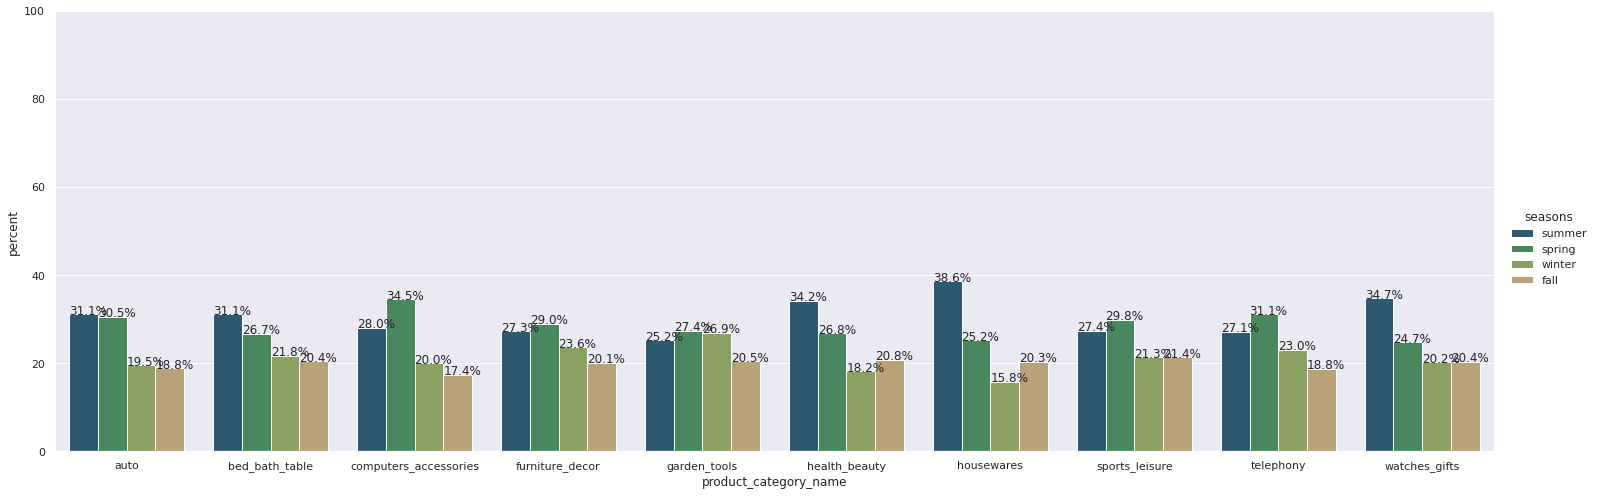

In [ ]:
# Visualization of the comparison of purchase rates of product categories by season
x,y = 'product_category_name', 'seasons'

df1 = top10category_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()


g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,  height=7, aspect=3, palette='gist_earth')
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Since Brazil has a tropical climate, there are no harsh winters and seasonal purchasing percentages of seasonal products such as garden tools are very close to each other. 

### Days Of Week

In [ ]:
# Adds percentage on plot 
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

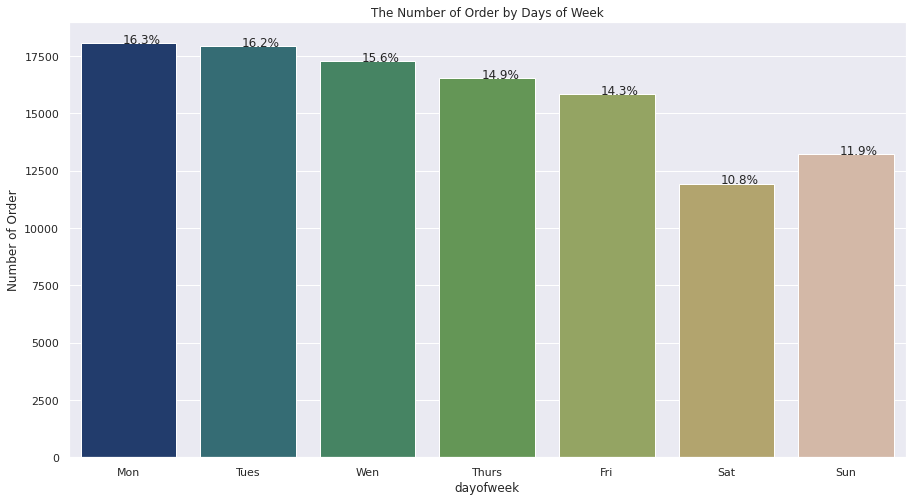

In [ ]:
# Order count and percentage by days of week
df['dayofweek']=pd.to_datetime(df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.dayofweek # Adds new column for days of week

# Visualization part
plt.figure(figsize=(15,8))
ax = sns.countplot(x='dayofweek', data=df, palette='gist_earth')
plt.ylabel("Number of Order")
plt.title("The Number of Order by Days of Week")
plt.xticks([0,1,2,3,4,5,6],["Mon","Tues","Wen","Thurs","Fri","Sat","Sun"])

without_hue(ax,df.dayofweek)

In the number of orders for the days of the week, Saturday is the day where the least order is created. The fact that customers attend more social activities on Saturdays may have caused a decrease in the number of orders. 

### Days of Month

Text(0.5, 1.0, 'The Number of Order by Days of Month')

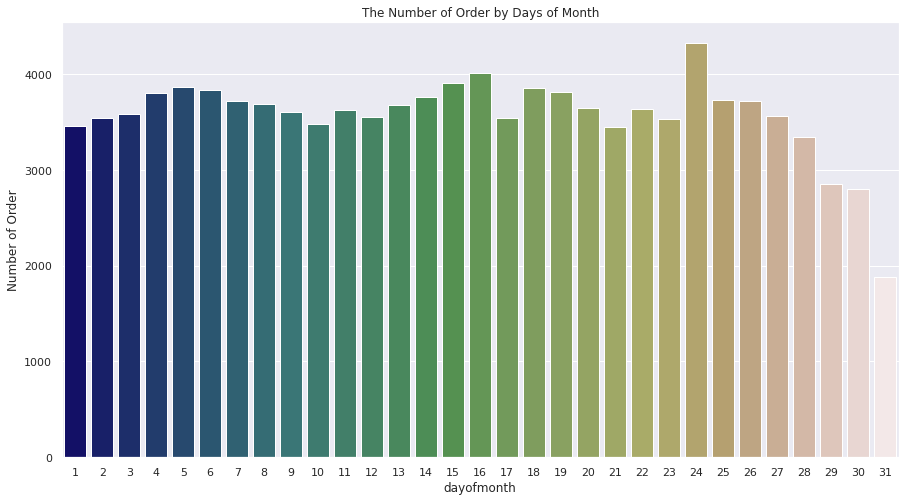

In [ ]:
# # Order count by days of month
df['dayofmonth']=pd.to_datetime(df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.day # Adds new column for day of month

# Visualization part
plt.figure(figsize=(15,8))
sns.countplot(x='dayofmonth', data=df, palette='gist_earth')
plt.ylabel("Number of Order")
plt.title("The Number of Order by Days of Month")

When we examine according to the days of the month, we observe that the number of orders in the column representing the 24th day is higher than the others. The fact that black friday coincided with November 24 in 2017 may have caused this column to stand out compared to other columns. In addition, since each month does not last 31 days, it has caused the total number of orders to be seen less in the column representing the 31st day compared to other days. Although there are fluctuations in the number of orders according to the days of the month, there is decrease as of the 25th day and it can be said that customers generally shop less towards the end of the month. 

### 2017 Order Count by Day and Holiday

In [ ]:
df['days'] = df['order_purchase_timestamp'].str.split(' ').str[0] # Adds new column without time values
df['days']


0         2017-10-02
1         2017-08-15
2         2017-08-02
3         2017-10-23
4         2017-08-24
             ...    
110745    2018-07-11
110746    2018-05-16
110747    2018-06-13
110748    2018-08-07
110749    2017-02-19
Name: days, Length: 110750, dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


[Text(0, 0.5, 'Order Count'), Text(0.5, 1.0, '2017 Order Count by Day ')]

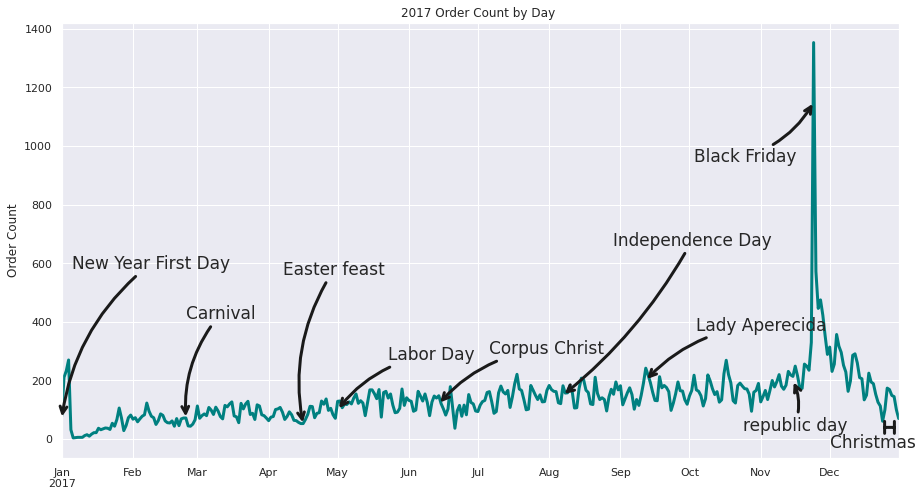

In [ ]:
df['days']=pd.to_datetime(df['days'], format='%Y-%m-%d', errors='coerce') # Changes days values from object type to datetime 

Order_Count_2017 = pd.DataFrame(df[(df["days"]>="2017-01-01") & (df["days"]<="2018-01-04")]) # Mask for one year (Since there was no order until 2017-01-04, masking was made until 2018-01-05 )
Order_Count_2017.set_index('days', inplace=True) # Set index with days object
Order_Count_2017 = Order_Count_2017.pivot_table(index=[Order_Count_2017.index.month,Order_Count_2017.index.day],values="order_id",aggfunc='count') # Creates pivot table that indexs are days and months
Order_Count_2017.index = [pd.datetime(2017,month,day) for (month,day)in Order_Count_2017.index ]

# Visualization part
fig, ax = plt.subplots(figsize=(15,8))
Order_Count_2017.plot(ax = ax, color="teal",linewidth=3, legend = False);

# Annotations for holiday 
ax.annotate("Black Friday", xy=("2017-11-24",1150),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points', fontsize=17,
            arrowprops=dict(arrowstyle="->", linewidth = 3, color = 'k',
                            connectionstyle="arc3,rad=0.2"))
ax.annotate("New Year First Day", xy=("2017-1-1",70),  xycoords='data',
            xytext=(10, 150), textcoords='offset points', fontsize=17,
            arrowprops=dict(arrowstyle="->", linewidth = 3, color = 'k',
                            connectionstyle="arc3,rad=0.2"))
ax.annotate("Labor Day", xy=("2017-5-1",100),  xycoords='data',
            xytext=(50, 50), textcoords='offset points', fontsize=17,
            arrowprops=dict(arrowstyle="->", linewidth = 3, color = 'k',
                            connectionstyle="arc3,rad=0.2"))
ax.annotate("Corpus Christ", xy=("2017-6-14",120),  xycoords='data',
            xytext=(50, 50), textcoords='offset points', fontsize=17,
            arrowprops=dict(arrowstyle="->", linewidth = 3, color = 'k',
                            connectionstyle="arc3,rad=0.2"))
ax.annotate("Lady Aperecida", xy=("2017-9-12",200),  xycoords='data',
            xytext=(50, 50), textcoords='offset points', fontsize=17,
            arrowprops=dict(arrowstyle="->", linewidth = 3, color = 'k',
                            connectionstyle="arc3,rad=0.2"))
ax.annotate("Independence Day", xy=("2017-8-7",150),  xycoords='data',
            xytext=(50, 150), textcoords='offset points', fontsize=17,
            arrowprops=dict(arrowstyle="->", linewidth = 3, color = 'k',
                            connectionstyle="arc3,rad=-0.1"))
ax.annotate("republic day", xy=("2017-11-15",200),  xycoords='data',
            xytext=(-50, -50), textcoords='offset points', fontsize=17,
            arrowprops=dict(arrowstyle="->", linewidth = 3, color = 'k',
                            connectionstyle="arc3,rad=0.2"))
ax.annotate('Christmas', xy=("2017-12-20",40), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points', fontsize=17)
ax.annotate('', xy=('2017-12-24', 40), xytext=('2017-12-30', 40),
            xycoords='data', textcoords='data',
            arrowprops=dict(arrowstyle= '|-|,widthA=0.5,widthB=0.5',linewidth = 3, color = 'k'))
ax.annotate("Easter feast", xy=("2017-4-16",50),  xycoords='data',
            xytext=(-20, 150), textcoords='offset points', fontsize=17,
            arrowprops=dict(arrowstyle="->", linewidth = 3, color = 'k',
                            connectionstyle="arc3,rad=0.2"))
ax.annotate('Carnival', xy=("2017-2-24",70), xycoords='data',
            xytext=(0, 100), textcoords='offset points', fontsize=17,
            arrowprops=dict(arrowstyle="->",linewidth = 3, color = 'k',
                            connectionstyle="arc3,rad=0.2"))
ax.set(title = "2017 Order Count by Day ", ylabel="Order Count")

In this section, the 10 days before the special days and black friday are labeled with the name of that special day. The remaining days will be labeled as ordinary_day. 

In [ ]:
holiday_df = df # Copys df to holiday_df
holiday_df["holiday_order"] = "ordinary_day" # Tags all orders as be ordinary_day

In [ ]:
holiday_df.loc[(holiday_df["days"]>"2017-9-2")&(holiday_df["days"]<="2017-9-12"),"holiday_order"] = "Lady Aperecida" 

In [ ]:
holiday_df.loc[(holiday_df["days"]>"2017-11-5")&(holiday_df["days"]<="2017-11-15"),"holiday_order"] = "Republic Day"

In [ ]:
holiday_df.loc[(holiday_df["days"]>"2017-12-20")&(holiday_df["days"]<"2018-01-01"),"holiday_order"] = "New Year"

In [ ]:
holiday_df.loc[(holiday_df["days"]>"2017-2-14")&(holiday_df["days"]<"2017-2-24"),"holiday_order"] = "Carnival"

In [ ]:
holiday_df.loc[(holiday_df["days"]>"2017-04-6")&(holiday_df["days"]<"2017-04-16"),"holiday_order"] = "Easter"

In [ ]:
holiday_df.loc[(holiday_df["days"]>"2017-12-14")&(holiday_df["days"]<"2017-12-24"),"holiday_order"] = "Christmas"

In [ ]:
holiday_df.loc[(holiday_df["days"]=="2017-11-24"),"holiday_order"] = "Black Friday"

In [ ]:
holiday_df.loc[(holiday_df["days"]<="2017-05-01")&(holiday_df["days"]>"2017-04-20"),"holiday_order"] = "Labor Day"

In [ ]:
holiday_df.loc[(holiday_df["days"]<"2017-06-16")&(holiday_df["days"]>"2017-06-06"),"holiday_order"] = "Corpus Christ"

In [ ]:
holiday_df.loc[(holiday_df["days"]<"2017-08-3")&(holiday_df["days"]>"2017-07-23"),"holiday_order"] = "Independence Day"

It removes ordinary_day from holiday_df and assigns the top 10 product categories according to each special day tag to variables consisting of the initials of special days. 

In [ ]:
holiday_df = holiday_df[holiday_df["holiday_order"] != "ordinary_day"]
ID = holiday_df[holiday_df["holiday_order"]=="Independence Day"].groupby("product_category_name")["order_id"].count().sort_values(ascending=False).head(10)
CC = holiday_df[holiday_df["holiday_order"]=="Corpus Christ"].groupby("product_category_name")["order_id"].count().sort_values(ascending=False).head(10)
LD = holiday_df[holiday_df["holiday_order"]=="Labor Day"].groupby("product_category_name")["order_id"].count().sort_values(ascending=False).head(10)
BF = holiday_df[holiday_df["holiday_order"]=="Black Friday"].groupby("product_category_name")["order_id"].count().sort_values(ascending=False).head(10)
CS = holiday_df[holiday_df["holiday_order"]=="Christmas"].groupby("product_category_name")["order_id"].count().sort_values(ascending=False).head(10)
ER = holiday_df[holiday_df["holiday_order"]=="Easter"].groupby("product_category_name")["order_id"].count().sort_values(ascending=False).head(10)
CL = holiday_df[holiday_df["holiday_order"]=="Carnival"].groupby("product_category_name")["order_id"].count().sort_values(ascending=False).head(10)
NY = holiday_df[holiday_df["holiday_order"]=="New Year"].groupby("product_category_name")["order_id"].count().sort_values(ascending=False).head(10)
RD = holiday_df[holiday_df["holiday_order"]=="Republic Day"].groupby("product_category_name")["order_id"].count().sort_values(ascending=False).head(10)
LA = holiday_df[holiday_df["holiday_order"]=="Lady Aperecida"].groupby("product_category_name")["order_id"].count().sort_values(ascending=False).head(10)

In [ ]:
# Edits these variables for ease of use in future codes. 
ID = pd.DataFrame(ID)
ID.reset_index(inplace=True)
CC = pd.DataFrame(CC)
CC.reset_index(inplace=True)
LD = pd.DataFrame(LD)
LD.reset_index(inplace=True)
BF = pd.DataFrame(BF)
BF.reset_index(inplace=True)
CS = pd.DataFrame(CS)
CS.reset_index(inplace=True)
ER = pd.DataFrame(ER)
ER.reset_index(inplace=True)
CL = pd.DataFrame(CL)
CL.reset_index(inplace=True)
NY = pd.DataFrame(NY)
NY.reset_index(inplace=True)
RD = pd.DataFrame(RD)
RD.reset_index(inplace=True)
LA = pd.DataFrame(LA)
LA.reset_index(inplace=True)

In [ ]:
# Prints the intersection of the top 10 product categories before each special day
merged_holiday = pd.concat([ID,CC,LD,BF,CS,ER,CL,NY,RD,LA])
merged_holiday.product_category_name.unique()

array(['bed_bath_table', 'sports_leisure', 'furniture_decor',
       'housewares', 'computers_accessories', 'health_beauty', 'toys',
       'cool_stuff', 'telephony', 'watches_gifts', 'perfumery',
       'garden_tools', 'auto', 'stationery'], dtype=object)

In [ ]:
# The holiday_best_category DataFrame only stores orders that contain the 10 most purchased product categories before each special day 
holiday_best_category = pd.DataFrame(data = None, columns=holiday_df.columns)
holiday_best_category_list = []
for i in merged_holiday.product_category_name.unique():
  holiday_best_category_list.append(holiday_df[holiday_df['product_category_name']==i])

holiday_best_category = pd.concat(holiday_best_category_list)
holiday_best_category 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,is_order_canceled,monthly,seasons,is_unavailable,hourly,part_of_the_day,dayofweek,dayofmonth,days,holiday_order
80502,a7c15b0c36e82951ecee0ed6d850ebb0,c61c3883,delivered,2017-11-09 09:45:40,2017-11-09 10:06:41,2017-11-14 19:59:06,2017-11-29 00:00:00,1,66e9bb4b,c1a5f5a8,2017-11-16 10:06:41,59.99,12.76,57.0,504.0,1.0,1450.0,30.0,15.0,30.0,ee89a45b,2808,sao paulo,SP,14940,ibitinga,SP,cbaa2ae22347e22bbb037d421072eee9,5,NaN,Compra perfeita.,2017-11-15 00:00:00,2017-11-21 10:22:36,bed_bath_table,no,11,winter,no,9,daytime,3,9,2017-11-09,Republic Day
80514,2d587ea1d70ea2fa8bc79a23cfe02ab4,206eaf8a,delivered,2017-12-21 14:09:51,2017-12-22 02:50:43,2018-01-04 22:57:14,2018-01-26 00:00:00,1,66e9bb4b,c1a5f5a8,2017-12-29 02:50:43,59.99,16.18,57.0,504.0,1.0,1450.0,30.0,15.0,30.0,46a8e2b2,95703,bento goncalves,RS,14940,ibitinga,SP,3b60df84d24c989c338e1a962550f3c2,4,NaN,no_review,2018-01-05 00:00:00,2018-01-08 16:54:06,bed_bath_table,no,12,winter,no,14,daytime,3,21,2017-12-21,Christmas
80516,ede4ebbb6e36cbd377eabcc7f5229575,9249ba2a,delivered,2017-12-15 12:08:40,2017-12-16 02:39:32,2017-12-26 19:13:17,2018-01-10 00:00:00,1,66e9bb4b,c1a5f5a8,2017-12-21 02:39:32,59.99,12.76,57.0,504.0,1.0,1450.0,30.0,15.0,30.0,029eb2c0,13081,campinas,SP,14940,ibitinga,SP,97dfcfb0a12b2dda1a28b03176b43220,4,NaN,no_review,2017-12-27 00:00:00,2017-12-27 23:06:25,bed_bath_table,no,12,winter,no,12,daytime,4,15,2017-12-15,Christmas
80519,604e352bcd3bb9d8932aebf18bc2891d,90b21085,delivered,2017-11-24 19:50:20,2017-11-24 22:59:37,2018-01-08 22:26:35,2017-12-14 00:00:00,1,66e9bb4b,c1a5f5a8,2017-11-29 22:59:37,59.99,12.76,57.0,504.0,1.0,1450.0,30.0,15.0,30.0,3b0a95f2,4836,sao paulo,SP,14940,ibitinga,SP,080d4fd2a99b7dcb4a0dd83577c43df2,1,NaN,Fiz a compra no Black Friday com outros dois p...,2017-12-16 00:00:00,2017-12-18 14:26:50,bed_bath_table,no,11,winter,no,19,evening,4,24,2017-11-24,Black Friday
80533,de43e0e00259ee7b44c7a11e9b5d114f,516b0c55,delivered,2017-11-13 22:09:39,2017-11-13 22:31:26,2017-11-20 21:27:59,2017-11-27 00:00:00,2,12515b2e,c1a5f5a8,2017-11-20 22:30:46,53.00,9.10,55.0,560.0,1.0,650.0,16.0,10.0,16.0,3e8baed3,14802,araraquara,SP,14940,ibitinga,SP,f10f3aebb0346efdba235a1c011690d7,4,NaN,no_review,2017-11-21 00:00:00,2017-11-23 15:15:46,bed_bath_table,no,11,winter,no,22,evening,0,13,2017-11-13,Republic Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80385,8d16656866ce7d67f81d49a9707ab76e,270769b3,invoiced,2017-12-25 18:36:16,2017-12-26 18:28:04,2018-01-30 00:00:00,2018-01-30 00:00:00,1,081b5619,18797b0a,2018-01-03 18:28:04,39.00,15.10,45.0,456.0,1.0,200.0,27.0,7.0,22.0,01b10b89,13490,cordeiropolis,SP,82040,curitiba,PR,36499d477f028aaa44cbf6d5f78d038c,1,NaN,meu produto não chegou,2018-02-01 00:00:00,2018-02-02 10:20:27,stationery,no,12,winter,no,18,evening,0,25,2017-12-25,New Year
80386,8d16656866ce7d67f81d49a9707ab76e,270769b3,invoiced,2017-12-25 18:36:16,2017-12-26 18:28:04,2018-01-30 00:00:00,2018-01-30 00:00:00,2,081b5619,18797b0a,2018-01-03 18:28:04,39.00,15.10,45.0,456.0,1.0,200.0,27.0,7.0,22.0,01b10b89,13490,cordeiropolis,SP,82040,curitiba,PR,36499d477f028aaa44cbf6d5f78d038c,1,NaN,meu produto não chegou,2018-02-01 00:00:00,2018-02-02 10:20:27,stationery,no,12,winter,no,18,evening,0,25,2017-12-25,New Year
80396,ef021274990500

This section includes the visualization of the sales count of the top 10 best-selling product categories according to special days, as it will predict the storages to be made.

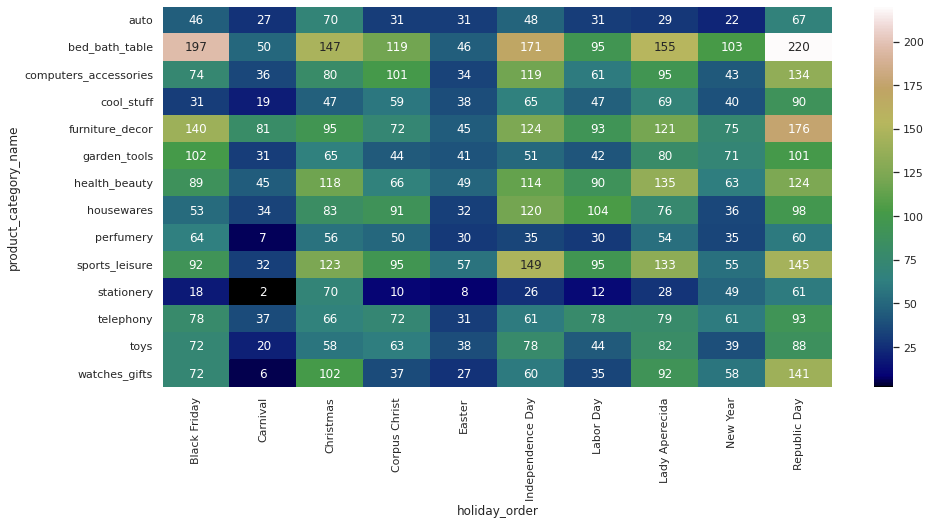

In [ ]:
plt.figure(figsize=(15,7))
c=pd.crosstab(index=holiday_best_category['product_category_name'], columns=holiday_best_category['holiday_order'])
sns.heatmap(c, cmap="gist_earth", annot=True, fmt='g');

## **The Effects of Product Promotion on the Orders Count**

### The Number of Photos, Price and Order Count

In [ ]:
# Labels all products as "more" if the product_photos_qty is more than 4 and "less" if the product_photos_qty is less than 4  
df["photo_qty"] = "less"
df.loc[df["product_photos_qty"]> 4 ,"photo_qty"] ="more"

df.to_sql("braziliandata",  conn, if_exists="replace") 

# Total number of orders for each product
sold_product_count = pd.read_sql(
    """
    SELECT product_id, "photo_qty", COUNT(order_id) AS order_count
    FROM braziliandata
    GROUP BY product_id
    """
    ,conn)
sold_product_count

,product_id,photo_qty,order_count
0,0001742a,less,1
1,00077663,more,19
2,0007a6d1,less,2
3,000b7434,less,1
4,000db3f6,less,1
...,...,...,...
32166,fff772b8,less,2
32167,fff79138,less,2
32168,fff9a582,more,1
32169,fffbca00,less,12


In [ ]:
sold_product_count.to_sql("sold_product_count",  conn, if_exists="replace") 

# Total product count by photo_qty
total_product_count = pd.read_sql(
    """
    SELECT photo_qty, SUM(order_count) AS total_order
    FROM sold_product_count
    GROUP BY photo_qty
    """
    ,conn)
total_product_count

,photo_qty,total_order
0,less,98592
1,more,12158


Text(0.5, 1.0, 'Total Number of Orders by Photo Count Tag')

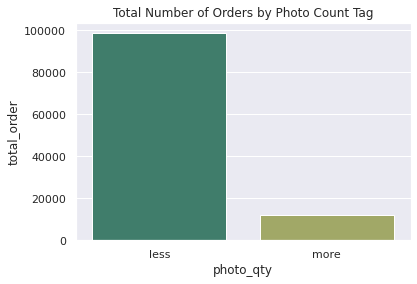

In [ ]:
# Visualaization of total number of orders by photo count tag
sns.barplot(data=total_product_count,x="photo_qty",y="total_order",palette="gist_earth")
plt.title("Total Number of Orders by Photo Count Tag")

In [ ]:
sold_product_count.to_sql("sold_product_count",  conn, if_exists="replace") 

# Average product count by photo_qty
avg_product_count = pd.read_sql(
    """
    SELECT photo_qty, AVG(order_count) AS avg_order
    FROM sold_product_count
    GROUP BY photo_qty
    """
    ,conn)
avg_product_count

,photo_qty,avg_order
0,less,3.413259
1,more,3.699939


Text(0.5, 1.0, 'Average of Orders by Photo Count Tag')

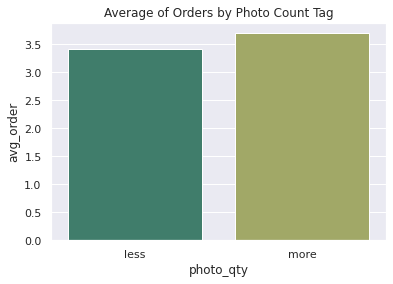

In [ ]:
# Visualaization of average of orders by photo count tag
sns.barplot(data=avg_product_count,x="photo_qty",y="avg_order",palette="gist_earth")
plt.title("Average of Orders by Photo Count Tag")

In [ ]:
sample_less = sold_product_count[sold_product_count["photo_qty"]=="less"]["order_count"]
sample_more = sold_product_count[sold_product_count["photo_qty"]=="more"]["order_count"]
stats.ttest_ind(sample_less, sample_more)

Ttest_indResult(statistic=-1.460322260537399, pvalue=0.1442112927506523)

1) Null Hypothesis: According to the photo_qty of the products, the average number of products sold is similar to each other. 

H0:x¯1==x¯2

2) Alternative Hypothesis: According to the photo_qty of the products, the average number of products sold is not similar to each other. 

Ha:x¯1≠x¯2

3) Confidence Level: 95%

Conclusion: Given a t-statistic of -1.460322260537399, and p-value of 0.1442112927506523, we fail to reject the null hypothesis that the total number of orders acording to photo_qty is the similar. Although the average sale rate of products with a large number of photos is slightly higher, there is no signicant statistical difference between these two cases according to photo_qty. 

According to photo_qty, the less category seems to be very high in the total number of products sold. The main reason for this image may be due to the fact that the majority of the products have less than 4 photos, because considering the average number of products sold, we do not see a difference in the average bar plot, and in statistical tests. Therefore, it can be said that the number of photos of the products does not affect the purchase. 


In the next section examined whether the price of products increased the number of photo postings by sellers. 

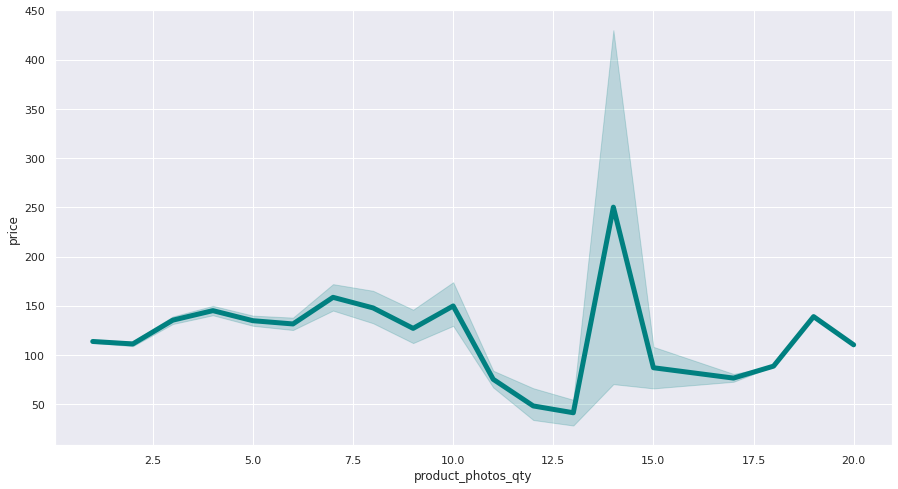

In [ ]:
# product_description_length and price distrubutions
plt.figure(figsize=(15,8))
sns.lineplot(x='product_photos_qty', y='price', data=df, color="teal", linewidth=5,
            markers=True,dashes=False, estimator='mean')

As can be seen from the line chart above, the low price of the product did not clearly reduce the number of products shared by the seller. Although it is observed that more photos are shared after the product's price of 160, it cannot be said that the price of the product has a clear effect on the number of photo sharing. 

### The Effects of Product Name Length on the Order Count

Text(0.5, 1.0, 'Order Count By Product Name Length')

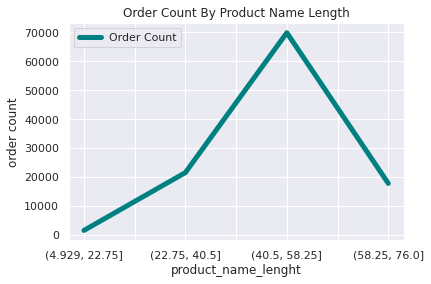

In [ ]:
# Creates line chart  between product name length and order count
name_length = pd.cut(df['product_name_lenght'],4) # Specifies 4 ranges for product name length 
name_length_df = df.pivot_table(index = name_length, aggfunc={"order_id":"count"})
name_length_df.plot(color="teal",linewidth=5)
L=plt.legend()
L.get_texts()[0].set_text('Order Count')
plt.ylabel("order count")
plt.title("Order Count By Product Name Length")

In [ ]:
# Labels all products as "long" if the product_name_length is more than 52.0 and "short" if the product_name_length is less than 52.0
df["name_length"] = "short"
df.loc[df["product_name_lenght"]>52.0,"name_length"] ="long"

df.to_sql("braziliandata",  conn, if_exists="replace") 

# Total number of orders for each product
product_name_length = pd.read_sql(
    """
    SELECT product_id, "name_length", COUNT(order_id) AS order_count
    FROM braziliandata
    GROUP BY product_id
    """
    ,conn)
product_name_length

,product_id,name_length,order_count
0,0001742a,long,1
1,00077663,long,19
2,0007a6d1,short,2
3,000b7434,short,1
4,000db3f6,short,1
...,...,...,...
32166,fff772b8,long,2
32167,fff79138,short,2
32168,fff9a582,long,1
32169,fffbca00,short,12


In [ ]:
product_name_length.to_sql("product_name_length",  conn, if_exists="replace") 

# Total product count by name_length
product_name_length_sum = pd.read_sql(
    """
    SELECT name_length, SUM(order_count) AS total
    FROM product_name_length
    GROUP BY name_length
    """
    ,conn)
product_name_length_sum

,name_length,total
0,long,51656
1,short,59094


Text(0.5, 1.0, 'Sum of Order Count by name_length Tag')

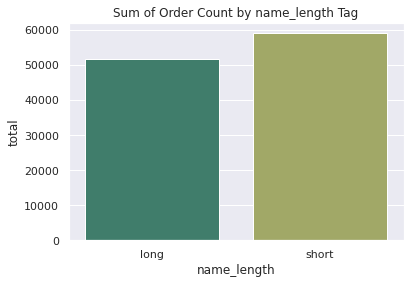

In [ ]:
# Visualaization of total number of orders by name_length tag
sns.barplot(data=product_name_length_sum, x="name_length",y="total",palette="gist_earth")
plt.title("Sum of Order Count by name_length Tag")

In [ ]:
# Average product count by name_length
product_name_length_avg = pd.read_sql(
    """
    SELECT name_length, AVG(order_count) AS average
    FROM product_name_length
    GROUP BY name_length
    """
    ,conn)
product_name_length_avg

,name_length,average
0,long,3.545611
1,short,3.357232


Text(0.5, 1.0, 'Average of Order Count by name_length Tag')

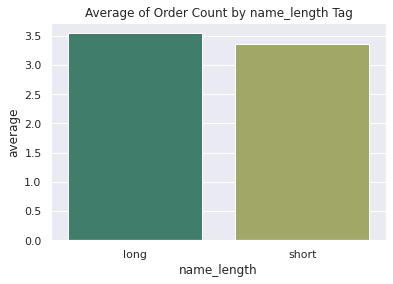

In [ ]:
# Visualization of average of order count  by name_lenth
sns.barplot(data=product_name_length_avg, x="name_length",y="average",palette="gist_earth")
plt.title("Average of Order Count by name_length Tag")

In [ ]:
sample_short = product_name_length[product_name_length["name_length"]=="short"]["order_count"]
sample_long = product_name_length[product_name_length["name_length"]=="long"]["order_count"]
stats.ttest_ind(sample_short, sample_long)

Ttest_indResult(statistic=-1.5772889729900297, pvalue=0.11473888138806236)

1) Null Hypothesis: According to the name length of the products, the average number of products sold is similar to each other.

H0:x¯1==x¯2

2) Alternative Hypothesis: According to the name length the products, the average number of products sold is not similar to each other.

Ha:x¯1≠x¯2

3) Confidence Level: 95%

Conclusion: Given a t-statistic of -1.5772889729900297, and p-value of 0.11473888138806236, we fail to reject the null hypothesis that the total number of orders acording to name_length is the similar. Although the average sale rate of products with a long name lentgh is slightly higher, there is no signicant statistical difference between these two cases according to name_length.

In other words, when we look at both the average table, the total comparison table and the statistical results, it can be said that the length of the product name has no effect on sales. 

### The Effects of Product Description Length on the Order Count

Text(0.5, 1.0, 'Order Count By Product Description Length')

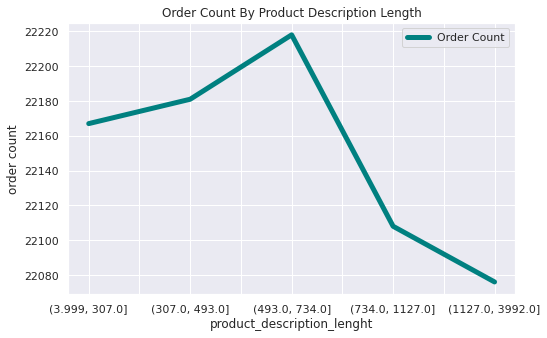

In [ ]:
# Creates line chart  between product description length and order count
product_description_lenght = pd.qcut(df['product_description_lenght'],5) # Specifies 5 ranges for product description length 
description_length = df.pivot_table(index = product_description_lenght, aggfunc={"order_id":"count"})
description_length.plot(color="teal",linewidth=5)
L=plt.legend()
L.get_texts()[0].set_text('Order Count')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.ylabel("order count")
plt.title("Order Count By Product Description Length")

In [ ]:
# Labels all products as "long" if the product_description_length is more than 601.0 and "short" if the product_description_length is less than 601.0
df["description_length"] = "short"
df.loc[df["product_description_lenght"]>601.0,"description_length"] ="long"

df.to_sql("braziliandata",  conn, if_exists="replace") 

# Total number of orders for each product
description_length_and_orders = pd.read_sql(
    """
    SELECT product_id, "description_length", COUNT(order_id) AS order_count
    FROM braziliandata
    GROUP BY product_id
    """
    ,conn)
description_length_and_orders

,product_id,description_length,order_count
0,0001742a,short,1
1,00077663,long,19
2,0007a6d1,long,2
3,000b7434,long,1
4,000db3f6,short,1
...,...,...,...
32166,fff772b8,long,2
32167,fff79138,short,2
32168,fff9a582,short,1
32169,fffbca00,long,12


In [ ]:
# Average of orders by description_length tag
description_length_and_orders.to_sql("description_length_and_orders",  conn, if_exists="replace") 
description_length_avg = pd.read_sql(
    """
    SELECT description_length, AVG(order_count) AS average
    FROM description_length_and_orders
    GROUP BY description_length
    """
    ,conn)
description_length_avg

,description_length,average
0,long,3.490949
1,short,3.395501


Text(0.5, 1.0, 'Average of Order Count by description_length Tag')

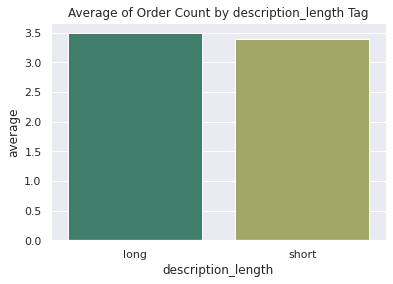

In [ ]:
# Visualaization of Average of orders by description_length tag
sns.barplot(data=description_length_avg, x="description_length",y="average",palette="gist_earth")
plt.title("Average of Order Count by description_length Tag")

In [ ]:
# Total number of orders by description_length tag
description_length_and_orders.to_sql("description_length_and_orders",  conn, if_exists="replace") 
description_length_sum = pd.read_sql(
    """
    SELECT description_length, SUM(order_count) AS total
    FROM description_length_and_orders
    GROUP BY description_length
    """
    ,conn)
description_length_sum

,description_length,total
0,long,55349
1,short,55401


Text(0.5, 1.0, 'Sum of Order Count by description_length Tag')

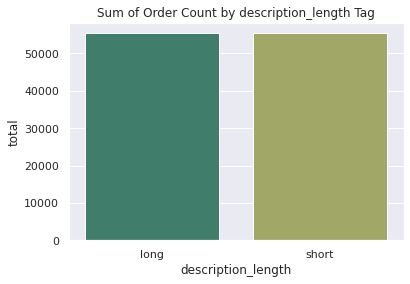

In [ ]:
# Visualaization of total number of orders by description_length tag
sns.barplot(data=description_length_sum, x="description_length",y="total",palette="gist_earth")
plt.title("Sum of Order Count by description_length Tag")

In [ ]:

sample_short_d = description_length_and_orders[description_length_and_orders["description_length"]=="short"]["order_count"]
sample_long_d = description_length_and_orders[description_length_and_orders["description_length"]=="long"]["order_count"]
stats.ttest_ind(sample_short_d, sample_long_d)


Ttest_indResult(statistic=-0.8026534363986756, pvalue=0.42218100308392326)

1) Null Hypothesis: According to the description length of the products, the average number of products sold is similar to each other.

H0:x¯1==x¯2

2) Alternative Hypothesis: According to the description length the products, the average number of products sold is not similar to each other.

Ha:x¯1≠x¯2

3) Confidence Level: 95%

Conclusion: Given a t-statistic of -0.8026534363986756, and p-value of 0.42218100308392326, we fail to reject the null hypothesis that the total number of orders acording to description_length is the similar. Although the average sale rate of products with a long description length is slightly higher, there is no signicant statistical difference between these two cases according to name_length.

In other words, when we look at both the average table, the total comparison table and the statistical results, it can be said that the length of the product description has no effect on sales. 

## **The Effects of Price on Customer Behavior**

### The Effects of Freight Value on the Order Count

Text(0.5, 1.0, 'Order Count By Freight Value')

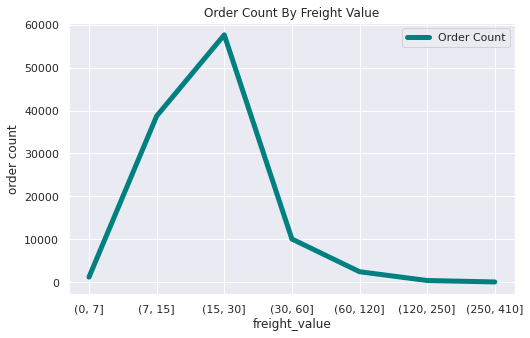

In [ ]:
# Creates line chart  between freight value and order count
freightValue = pd.cut(df['freight_value'],[0,7,15,30,60,120,250,410]) # Specifies 7 ranges for freight value
freight_value_and_order = df.pivot_table(index = freightValue, aggfunc={"order_id":"count"})
freight_value_and_order.plot(color="teal",linewidth=5)
L=plt.legend()
L.get_texts()[0].set_text('Order Count')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.ylabel("order count")
plt.title("Order Count By Freight Value")

It is clearly seen on the line chart that the purchase rates have dropped a lot after the interval (30,60]. By looking at this image, it can be said that customers tolerate the freight value up to a certain price. 

### Customer' Preffered Payment Method Based on the Payment Values

In [ ]:
df_with_paymentDetails.payment_type.unique() # Unique payment types 

array(['credit_card', 'voucher', 'boleto', 'debit_card'], dtype=object)

Text(0.5, 1.0, 'Mean Payment Value by Payment Types')

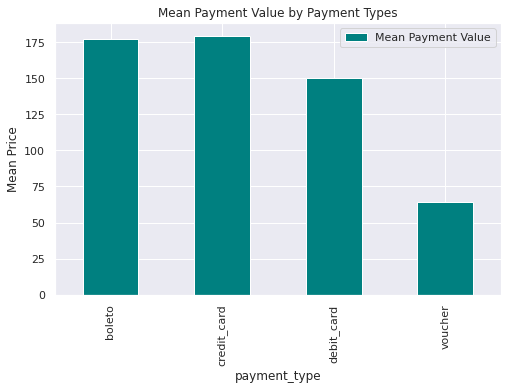

In [ ]:
# Creates bar chart  between payment type and mean of payment value
df_with_paymentDetails.pivot_table(index="payment_type",aggfunc={"payment_value":"mean"}).plot(kind="bar",color="teal")

L=plt.legend()
L.get_texts()[0].set_text('Mean Payment Value')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.ylabel("Mean Price")
plt.title("Mean Payment Value by Payment Types")

Text(0.5, 1.0, 'Sum Payment Value by Payment Types')

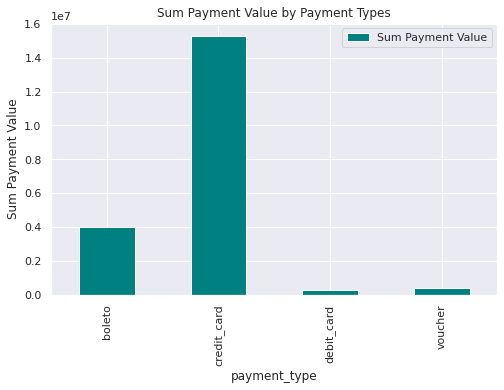

In [ ]:
# Creates bar chart  between payment type and sum of payment value
df_with_paymentDetails.pivot_table(index="payment_type",aggfunc={"payment_value":"sum"}).plot(kind="bar",color="teal")

L=plt.legend()
L.get_texts()[0].set_text('Sum Payment Value')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.ylabel("Sum Payment Value")
plt.title("Sum Payment Value by Payment Types")

In [ ]:
# Order count of each payment type for each customer
df_with_paymentDetails.to_sql("brazilian_data_and_payments",  conn, if_exists="replace") 
payment_type_and_customer = pd.read_sql(
    """
    SELECT customer_unique_id, payment_type, COUNT(DISTINCT order_id) AS order_count
    FROM brazilian_data_and_payments
    GROUP BY customer_unique_id, payment_type
    ORDER BY order_count DESC
    """
    ,conn)
payment_type_and_customer

,customer_unique_id,payment_type,order_count
0,e2ac8455,credit_card,15
1,b2acf44c,credit_card,9
2,2e7f1782,credit_card,7
3,95df0b3d,boleto,6
4,b4d5fdf3,boleto,6
...,...,...,...
95838,fffdba8b,credit_card,1
95839,fffdc86a,credit_card,1
95840,fffe04aa,credit_card,1
95841,ffff43c5,boleto,1


In [ ]:
# Run the ANOVA
payment_aov = pg.anova(data=df_with_paymentDetails, dv='payment_value', between='payment_type', detailed=True)
payment_aov

,Source,SS,DF,MS,F,p-unc,np2
0,payment_type,7.749018e+07,3,2.583006e+07,368.8928,1.790904e-238,0.009482
1,Within,8.094720e+09,115605,7.002050e+04,NaN,NaN,NaN


Average Payment Value by customers for 4 payment_type are significantly different from each other. However in the anova test method, T-test is applied between credit_card-boleto, boleto-debit_card and boleto-voucher, since it is not clear in which payment_type customers are using to paid more.

In [ ]:
sample_card = df_with_paymentDetails[df_with_paymentDetails["payment_type"]=="credit_card"]["payment_value"]
sample_boleto = df_with_paymentDetails[df_with_paymentDetails["payment_type"]=="boleto"]["payment_value"]
stats.ttest_ind(sample_card, sample_boleto)

Ttest_indResult(statistic=1.2155178593787426, pvalue=0.22417130370972596)

1) Null Hypothesis: According to the payment_type used by customer, the average number of ppayment_value is similar to each other.

H0:x¯1==x¯2

2) Alternative Hypothesis: According to the payment_type used by customer, the average number of ppayment_value is not similar to each other.

Ha:x¯1≠x¯2

3) Confidence Level: 95%

Conclusion: Given a t-statistic of 1.2155178593787426, and p-value of 0.22417130370972596, we fail to reject the null hypothesis that the average price of payment_value acording to customer is the similar. There is no signicant statistical difference between these two cases according to payment_type.

In other words, when we look at both the average tableand the statistical results, it can be said that the customers use credit card and boleto method for high payouts 

In [ ]:
sample_debit = df_with_paymentDetails[df_with_paymentDetails["payment_type"]=="debit_card"]["payment_value"]
stats.ttest_ind(sample_debit, sample_boleto )

Ttest_indResult(statistic=-3.6407162101606483, pvalue=0.00027244804332901003)

1) Null Hypothesis: According to the payment_type used by customer, the average number of ppayment_value is similar to each other.

H0:x¯1==x¯2

2) Alternative Hypothesis: According to the payment_type used by customer, the average number of ppayment_value is not similar to each other.

Ha:x¯1≠x¯2

3) Confidence Level: 95%

Conclusion: Given a t-statistic of 1.2155178593787426, and p-value of 0.22417130370972596, we reject the null hypothesis that the average price of payment_value acording to customer is not similar. There is signicant statistical difference between these two cases according to payment_type.

In other words, when we look at both the average tableand the statistical results, it can be said that the customers use boleto instead of debit card method for high payouts .

In [ ]:
sample_voucher = df_with_paymentDetails[df_with_paymentDetails["payment_type"]=="voucher"]["payment_value"]
stats.ttest_ind(sample_voucher
                , sample_boleto)

Ttest_indResult(statistic=-30.211480527536875, pvalue=2.0893679592952428e-197)

1) Null Hypothesis: According to the payment_type used by customer, the average number of ppayment_value is similar to each other.

H0:x¯1==x¯2

2) Alternative Hypothesis: According to the payment_type used by customer, the average number of ppayment_value is not similar to each other.

Ha:x¯1≠x¯2

3) Confidence Level: 95%

Conclusion: Given a t-statistic of -30.211480527536875, and p-value of 2.0893679592952428e-197, we reject the null hypothesis that the average price of payment_value acording to customer is not similar. There is signicant statistical difference between these two cases according to payment_type.

In other words, when we look at both the average tableand the statistical results, it can be said that the customers use boleto instead of voucher method for high payouts .

## **After Sales**

In [ ]:
df[df['review_comment_message']!="no_review"]['review_comment_message'].str.split().str.len() # Calculates comment length

0         32
1         15
2         12
4         38
5         38
          ..
110738     8
110744    15
110745    38
110748     4
110749    15
Name: review_comment_message, Length: 46923, dtype: int64

In [ ]:
df["comment_length"] = df[df['review_comment_message']!="no_review"]['review_comment_message'].str.split().str.len() # Adds new column for comment length
df 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,is_order_canceled,monthly,seasons,is_unavailable,hourly,part_of_the_day,dayofweek,dayofmonth,days,holiday_order,photo_qty,name_length,description_length,comment_length
0,e481f51cbdc54678b7cc49136f2d6af7,b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,c7ac498a,c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2b4e5bff,3149,sao paulo,SP,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,no,10,fall,no,10,daytime,0,2,2017-10-02,ordinary_day,less,short,short,32.0
1,128e10d95713541c87cd1a2e48201934,7daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28 00:00:00,1,c7ac498a,c94d59d9,2017-08-21 20:05:16,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,28cb05f7,3366,sao paulo,SP,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,housewares,no,8,fall,no,18,evening,1,15,2017-08-15,ordinary_day,less,short,short,15.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15 00:00:00,1,c7ac498a,c94d59d9,2017-08-08 18:37:31,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,be23d235,2290,sao paulo,SP,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,housewares,no,8,fall,no,18,evening,2,2,2017-08-02,Independence Day,less,short,short,12.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13 00:00:00,1,c7ac498a,c94d59d9,2017-10-31 02:14:11,29.99,14.10,40.0,268.0,4.0,500.0,19.0,8.0,13.0,711cc572,88032,florianopolis,SC,9350,maua,SP,1bafb430e498b939f258b9c9dbdff9b1,3,NaN,no_review,2017-11-08 00:00:00,2017-11-10 19:52:38,housewares,no,10,fall,no,23,evening,0,23,2017-10-23,ordinary_day,less,short,short,NaN
4,5f49f31e537f8f1a496454b48edbe34d,920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-28 20:12:20,2017-09-14 00:00:00,2,ca6ead98,c94d59d9,2017-08-30 11:45:25,46.80,67.70,59.0,189.0,3.0,775.0,16.0,16.0,13.0,89c5571c,1315,sao paulo,SP,9350,maua,SP,8899ca945efd951c97107b4966289227,1,NaN,Prezados que porcaria de atendimento ao client...,2017-08-29 00:00:00,2017-08-30 02:26:02,housewares,no,8,fall,no,11,daytime,3,24,2017-08-24,ordinary_day,less,long,short,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110745,442a41b00a8a8bda35511fdf1eb65cc5,321c2811,invoiced,2018-07-11 22:27:32,2018-07-11 22:45:43,2018-07-20 00:00:00,2018-07-20 00:00:00,1,fb13ea56,7815b97d,2018-07-16 22:45:43,44.99,7.58,53.0,568.0,1.0,300.0,25.0,2.0,30.0,9a2daa5d,3402,sao paulo,SP,5201,sao paulo,SP,633538990df4c5fb118483feb8557347,1,Atraso na entrega,O pedido do produto foi realizado no dia 11/07...,2018-07-22 00:00:00,2018-07-24 13:06:43,books_imported,no,7,summer,no,22,evening,2,11,2018-07-11,ordinary_day,less,long,short,38.0
110746,1dbff949801376b8795a093d31cfe205,c44886bc,delivered,2018-05-16 14:50:54,2018-05-16 15:18:42,2018-05-21 17:14:08,2018-05-28 00:00:00,1,a25f35ce,7815b97d,2018-05-22 15:18:42,5

In [ ]:
df['comment_length'].fillna(0,inplace=True) # If has no comment , fills null values with 0
df 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,is_order_canceled,monthly,seasons,is_unavailable,hourly,part_of_the_day,dayofweek,dayofmonth,days,holiday_order,photo_qty,name_length,description_length,comment_length
0,e481f51cbdc54678b7cc49136f2d6af7,b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,c7ac498a,c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2b4e5bff,3149,sao paulo,SP,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,no,10,fall,no,10,daytime,0,2,2017-10-02,ordinary_day,less,short,short,32.0
1,128e10d95713541c87cd1a2e48201934,7daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28 00:00:00,1,c7ac498a,c94d59d9,2017-08-21 20:05:16,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,28cb05f7,3366,sao paulo,SP,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,housewares,no,8,fall,no,18,evening,1,15,2017-08-15,ordinary_day,less,short,short,15.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15 00:00:00,1,c7ac498a,c94d59d9,2017-08-08 18:37:31,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,be23d235,2290,sao paulo,SP,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,housewares,no,8,fall,no,18,evening,2,2,2017-08-02,Independence Day,less,short,short,12.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13 00:00:00,1,c7ac498a,c94d59d9,2017-10-31 02:14:11,29.99,14.10,40.0,268.0,4.0,500.0,19.0,8.0,13.0,711cc572,88032,florianopolis,SC,9350,maua,SP,1bafb430e498b939f258b9c9dbdff9b1,3,NaN,no_review,2017-11-08 00:00:00,2017-11-10 19:52:38,housewares,no,10,fall,no,23,evening,0,23,2017-10-23,ordinary_day,less,short,short,0.0
4,5f49f31e537f8f1a496454b48edbe34d,920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-28 20:12:20,2017-09-14 00:00:00,2,ca6ead98,c94d59d9,2017-08-30 11:45:25,46.80,67.70,59.0,189.0,3.0,775.0,16.0,16.0,13.0,89c5571c,1315,sao paulo,SP,9350,maua,SP,8899ca945efd951c97107b4966289227,1,NaN,Prezados que porcaria de atendimento ao client...,2017-08-29 00:00:00,2017-08-30 02:26:02,housewares,no,8,fall,no,11,daytime,3,24,2017-08-24,ordinary_day,less,long,short,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110745,442a41b00a8a8bda35511fdf1eb65cc5,321c2811,invoiced,2018-07-11 22:27:32,2018-07-11 22:45:43,2018-07-20 00:00:00,2018-07-20 00:00:00,1,fb13ea56,7815b97d,2018-07-16 22:45:43,44.99,7.58,53.0,568.0,1.0,300.0,25.0,2.0,30.0,9a2daa5d,3402,sao paulo,SP,5201,sao paulo,SP,633538990df4c5fb118483feb8557347,1,Atraso na entrega,O pedido do produto foi realizado no dia 11/07...,2018-07-22 00:00:00,2018-07-24 13:06:43,books_imported,no,7,summer,no,22,evening,2,11,2018-07-11,ordinary_day,less,long,short,38.0
110746,1dbff949801376b8795a093d31cfe205,c44886bc,delivered,2018-05-16 14:50:54,2018-05-16 15:18:42,2018-05-21 17:14:08,2018-05-28 00:00:00,1,a25f35ce,7815b97d,2018-05-22 15:18:42,5

In [ ]:
# Labels all orders as "yes" if the comment_length is not zero and "no" if the comment_length is zero.
df["has_comment"] ="no"
df.loc[df["comment_length"]!=0, "has_comment"] = "yes"

Text(0.5, 1.0, 'Percentage of Comments Count')

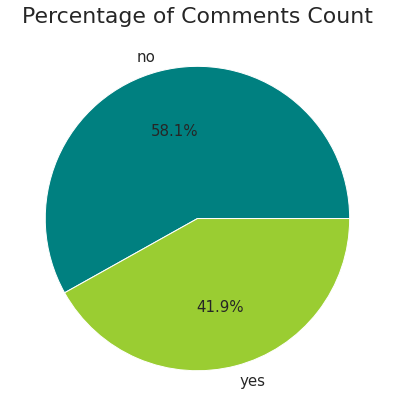

In [ ]:
# Creates pie chart by has_comment
fig, ax = plt.subplots(figsize =(10, 7))
df[df["order_status"]=="delivered"].groupby("has_comment").size().plot(kind="pie", autopct="%1.1f%%", textprops={'fontsize': 15},
                                  colors=["teal",'yellowgreen'], ax=ax)
ax.set_ylabel('', size=15)
plt.title("Percentage of Comments Count",size=22)

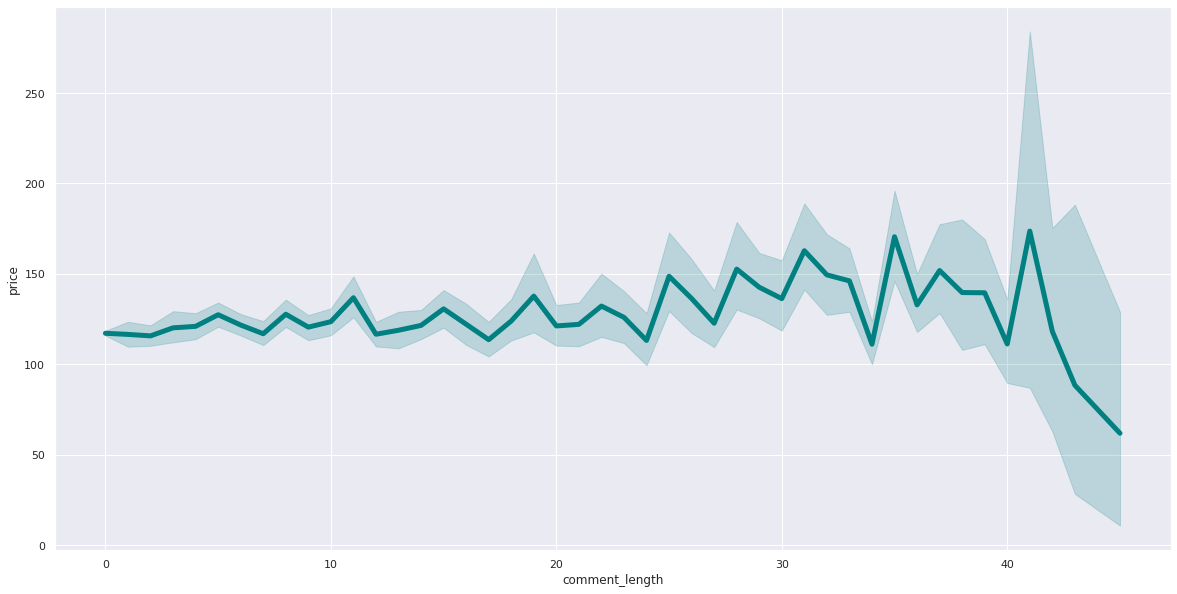

In [ ]:
# Creates line chart  between comment length and price 
plt.figure(figsize=(20,10))
sns.lineplot(x='comment_length', y='price', data=df, color="teal", linewidth=5,
            markers=True,dashes=False, estimator='mean')

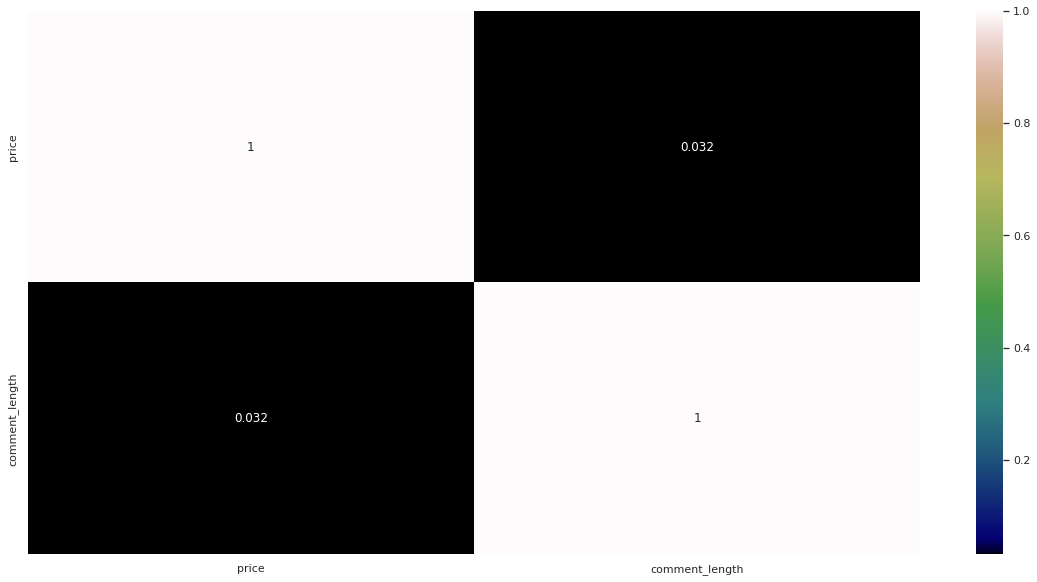

In [ ]:
# Creates heatmap between price and comment_length
plt.figure(figsize=(20,10))
c= df[["price","comment_length"]].corr()
sns.heatmap(c,cmap="gist_earth",annot=True)

When we look at the correlation matrix and line chart between the prices of the products and the comments made, it can be said that there is no relationship between the prices of the produxts and the comments length. Since we cannot see the names of the products belonging to this data set, we cannot make a price comparison and comment length comparison between products. 

In [ ]:
df.pivot_table("comment_length",index="review_score") # Shows the average length of comments according to the review score 

,comment_length
review_score,
1,13.719062
2,12.190076
3,6.819187
4,3.384835
5,3.015078


Text(0.5, 1.0, 'Comment Length And Review Score')

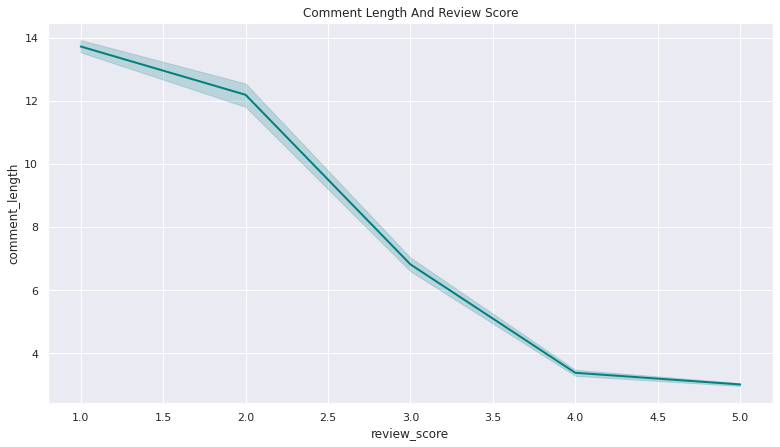

In [ ]:
# Creates line chart  between comment length and review score 
plt.figure(figsize=(13,7))
sns.lineplot(x='review_score', y='comment_length', data=df, color="teal", linewidth=2,
            markers=True,dashes=False, estimator='mean')
plt.title("Comment Length And Review Score")

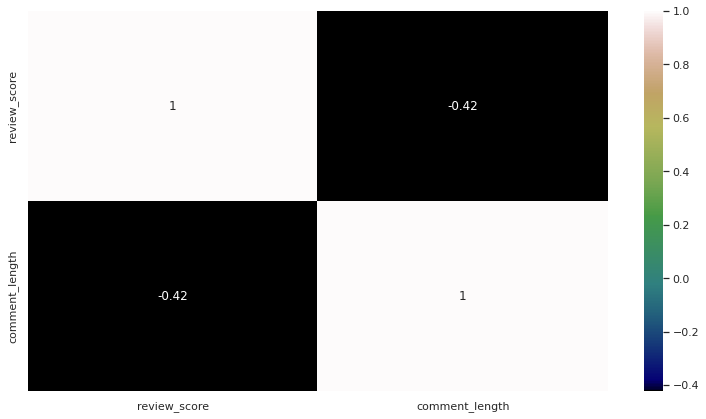

In [ ]:
# # Creates heatmap between review score and comment_length
plt.figure(figsize=(13,7))
c= df[["review_score","comment_length"]].corr()
sns.heatmap(c,cmap="gist_earth",annot=True)  

Considering the length of the comments made by the customers, most of the customers who evaluated the product negatively gave feedback by using longer sentences. This may seem like a disadvantage for the e-commerce site, but the disadvantage can be turned into an advantage. According to the review score given by a customer who logs in to the site to comment, it can be detected whether he likes the product or not, and if necessary studies are done carried out, the trust of the customers may be will regained during the time they comment on the site. In this case, the number of lost customers will also decrease.